# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**
Creo que me ayudarian a trabajar en el problema datos como; 
1) PRECIO POR M2. Para intuir si el inmueble se encuentra en una zona de cara

2) CANTIDAD TOTAL DEL INMUEBLE Y CANTIDAD CUBIERTA DEL INMUBELE. Para detectar datos ilogicos, se eliminaran las
instancias que tengan mas superficie cubierta que total

3) ZONA DE LA RESIDENCIA. Porque dependiendo de la zona el inmueble tendra un valor mas elevado o mucho mas bajo

4) CANTIDAD DE HABITACIONES(Rooms). Variara el precio del inmueble a medida que tenga mas habitaciones

5) AÑOS DE ANTIEGUEDAD. Nos sera de utilidad para darnos una primera impresion del estado del inmueble,
si es nuevo, se encontrara en mejores condiciones


---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



**Importamos librerias**

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Importamos el dataset**

In [39]:
df = pd.read_csv (r'C:\Users\Tomás.r3\Desktop\DATA SCIENCE\SPRINT PROYECT\DS_Proyecto_01_Datos_Properati.csv') #Cargamos el dataset
print('La cantidad de instancias es :',len(df.axes[0])) #Contamos la cantidad de instancias
print('La cantidad de columnas es :',len(df.axes[1])) #al igual que arriba pero las columnas

La cantidad de instancias es : 146660
La cantidad de columnas es : 19


**Primeras impresiones del dataset**

In [40]:
for col in df.columns:
    print(col)

start_date
end_date
created_on
lat
lon
l1
l2
l3
rooms
bedrooms
bathrooms
surface_total
surface_covered
price
currency
title
description
property_type
operation_type


Se puden apreciar los nombres de las 19 columnas

*Algunos datos estadisticos acerca de nuestras variables numericas que se encuentran en el DataFrame*

In [41]:
df.describe()

lat            lon          rooms       bedrooms  \
count  136735.000000  136701.000000  146660.000000  146660.000000   
mean      -34.604896     -58.465304       3.079817       1.983240   
std         0.468428       0.486190       1.416352       1.151304   
min       -35.318457    -180.000000       1.000000       0.000000   
25%       -34.627667     -58.504012       2.000000       1.000000   
50%       -34.600943     -58.443262       3.000000       2.000000   
75%       -34.574600     -58.407586       4.000000       3.000000   
max        85.051129     -57.805832      35.000000      15.000000   

           bathrooms  surface_total  surface_covered         price  
count  140703.000000  126133.000000    125046.000000  1.466600e+05  
mean        1.599994     216.872888       112.818011  2.412211e+05  
std         0.889324    2037.606649       916.857584  3.185195e+05  
min         1.000000      10.000000         1.000000  5.500000e+03  
25%         1.000000      52.000000        47.000000  1.110000e+05  
50%         1.000000      78.000000        68.000000  1.660000e+05  
75%         2.000000     140.000000       108.000000  2.650000e+05  
max        14.000000  193549.000000    126062.000000  3.243423e+07

***Primera Impresion de nuestros datos***

In [42]:
df.head()

start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1           70.0             58.0  159000.0      USD   
2           45.0             45.0  125000.0      USD   
3           85.0             50.0  295000.0      USD   
4           50.0             35.0   40000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
4          Venta

****Variables****

In [43]:
df.dtypes.value_counts()

object     11
float64     8
dtype: int64

In [44]:
tipos = df.dtypes
numericas = tipos[tipos != object].index
no_numericas = tipos[tipos == object].index
print(numericas)
print(no_numericas)

Index(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price'],
      dtype='object')
Index(['start_date', 'end_date', 'created_on', 'l1', 'l2', 'l3', 'currency',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')


Haciendo un analisis de las variables tenemos 19, de las cuales 11 son no numericas y las 8 restantes numericas

---
2. **Valores Faltantes**
<br/>
---
Verificamos los valores faltantes


In [45]:
valores_faltantes = df.isnull().sum().sort_values(ascending=False)
print(valores_faltantes)

surface_covered    21614
surface_total      20527
lon                 9959
lat                 9925
bathrooms           5957
start_date             0
property_type          0
description            0
title                  0
currency               0
price                  0
bedrooms               0
end_date               0
rooms                  0
l3                     0
l2                     0
l1                     0
created_on             0
operation_type         0
dtype: int64


In [46]:
#vemos los porcentajes de datos NaN de las columnas 

valores_faltantes/len(df)

surface_covered    0.147375
surface_total      0.139963
lon                0.067905
lat                0.067674
bathrooms          0.040618
start_date         0.000000
property_type      0.000000
description        0.000000
title              0.000000
currency           0.000000
price              0.000000
bedrooms           0.000000
end_date           0.000000
rooms              0.000000
l3                 0.000000
l2                 0.000000
l1                 0.000000
created_on         0.000000
operation_type     0.000000
dtype: float64

**En conclusion, de las columnas con datos faltantes tenemos 2 con casi 15% surface_covered y surface_total, luego las columnas lon y lat con alrededor de 7%**

---
3. ****Tipos de propiedad****
<br/>
---

Text(0, 0.5, 'Cantidad De Propiedades')

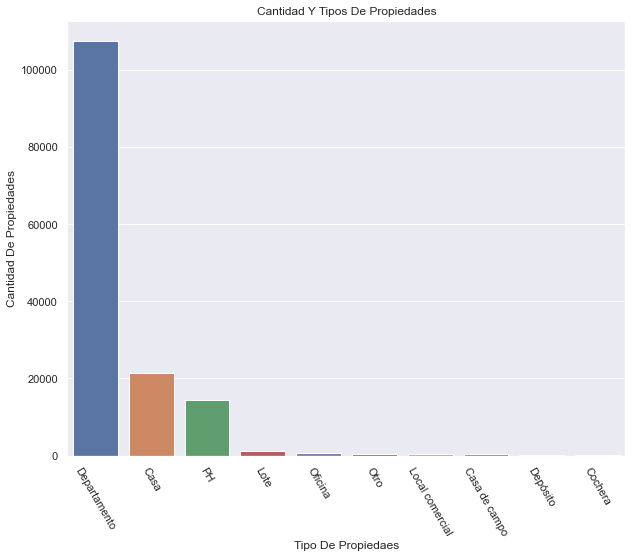

In [47]:
grafico_1= sns.countplot( x='property_type', data=df, order = df["property_type"].value_counts().index)
sns.set(rc={'figure.figsize':(9,8)})
grafico_1.set_xticklabels(grafico_1.get_xticklabels(),rotation = 300)
grafico_1.set_title('Cantidad Y Tipos De Propiedades')
grafico_1.set_xlabel('Tipo De Propiedaes')
grafico_1.set_ylabel('Cantidad De Propiedades')

A simple vista se apreciar los 10 tipos de propiedades; los representativos son Departamento. Casa y Ph ademas de Lote, Oficina, Otro, Local Comercial , Casa de Campo, Depòsito y cochera. que no poseen una cantidad significativa de instancias 

**Regiones**

Text(0, 0.5, 'Cantidad De Propiedades')

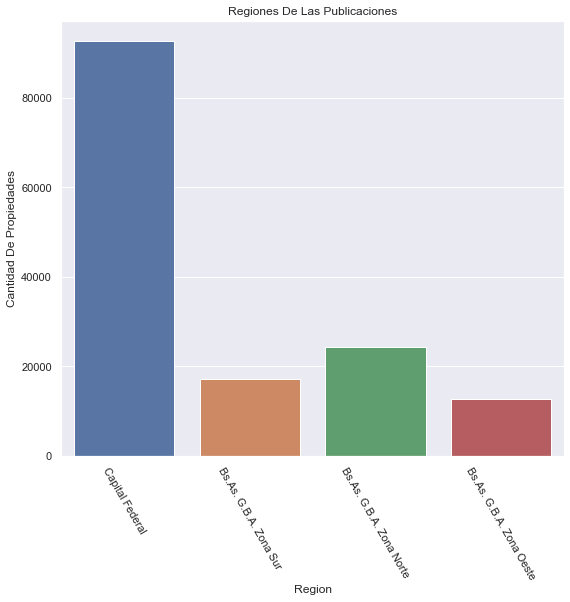

In [48]:
grafico_2 = sns.countplot( x='l2', data=df)
sns.set(rc={'figure.figsize':(9,8)})
grafico_2.set_xticklabels(grafico_2.get_xticklabels(),rotation = 300)
grafico_2.set_title('Regiones De Las Publicaciones')
grafico_2.set_xlabel('Region')
grafico_2.set_ylabel('Cantidad De Propiedades')

NameError: name 'get_xticklabels' is not defined

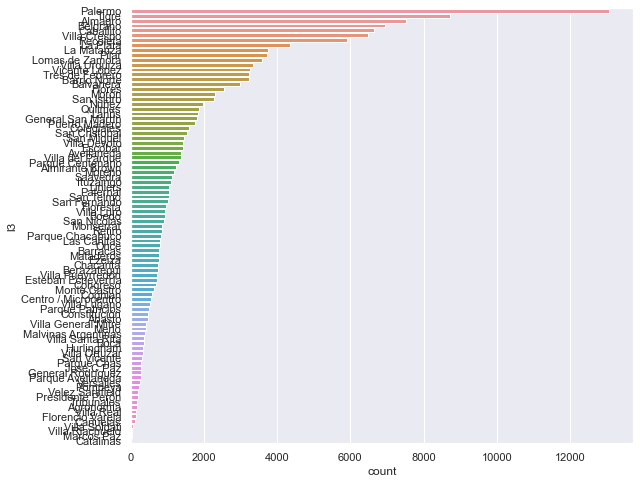

In [49]:
grafico_3 = sns.countplot( y='l3', orient = "h", data=df, order = df["l3"].value_counts().index)
sns.set(rc={'figure.figsize':(25,20)})
grafico_3.set_xticklabels(get_xticklabels(),rotation = 300)
grafico_3.set_title('Regiones De Las Publicaciones')  
grafico_3.set_xlabel('Region')
grafico_3.set_ylabel('Cantidad De Propiedades')

Estos graficos nos dejan claras dos cosas 1 La region que mas publicaciones abarca es Capital Federal con mas de *80000* y los barrios con mas publicaciones son Palermo, Tigre y Almagro 

# **Filtrando el Dataset:** 

In [56]:
dff = df.loc[(df["l2"].isin(["Capital Federal"])) &                    #aplicamos una mascara para filtrar los datos de nuestro interes
                 (df["property_type"].isin(["Casa","PH","Departamento"]))]

In [57]:
df_no = df.loc[(df["l2"].isin(["Capital Federal"])) &                    #aplicamos una mascara para filtrar los datos de nuestro interes
                 (df["property_type"].isin(["Casa","PH","Departamento"]))]

In [58]:
print(dff.shape)
print(df_no.shape)

(91485, 19)
(91485, 19)


**Tratamiento de Outliers**

Vamos a trabajar los outliers de cada columna, los outliers son una observacion numericamente muy distante al resto de los datos, para ello vamos a graficar boxplots que nos ayudaran a vizualizarlos

*Trabajando con "surface_total"* que representa la superficie total del inmueble

Como pudimos observar en el grafico hay instancias con valores muy grandes en la superficie total que nos dificultara el manejo de los datos a futuro, para tener otra aproximacion filtraremos los datos que no superen los 2000 metros cuadrados y que sean mayores a 25

In [60]:
#Ahora vamos a filtrar datos de la columna surface_total para que sean menores que 2000 y mayores a 25
dff = dff[(dff['surface_total'] > 25)  &  (dff['surface_total'] <= 2000)]

# Trabajamos con "surface_covered" que representa la superficie cubierta del inmueble

Text(0, 0.5, 'Metros cuadrados')

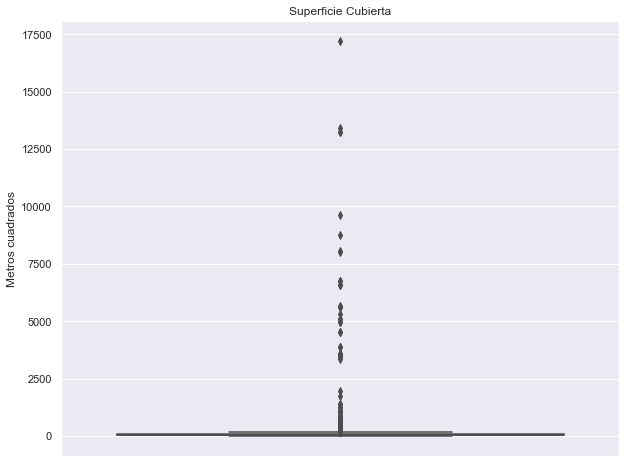

In [61]:
g = sns.boxplot(y=dff["surface_covered"])
g.set_title('Superficie Cubierta')
g.set_ylabel('Metros cuadrados')

Como la anterior esta variable tambien presenta valores problematicos, aplicaremos un filtro para quedarnos con las que sean menores a su superficie total y que sean menores a 1000m2

In [62]:
#nuevodf3 = nuevodf2[nuevodf2['surface_covered'] < 1000]

dff = dff[(dff["surface_covered"] > 15) & (dff["surface_covered"] < 1000)]


In [63]:
dff = dff[dff["surface_total"] > dff["surface_covered"]]
#ahora los valores seran mas logicos, ya que la superficie cubierta no puede ser mayor a la superficie total

# Ahora le toca el turno a la variable "Rooms" que representa la cantidad de habitaciones del inmueble

C:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Cantidad de rooms')

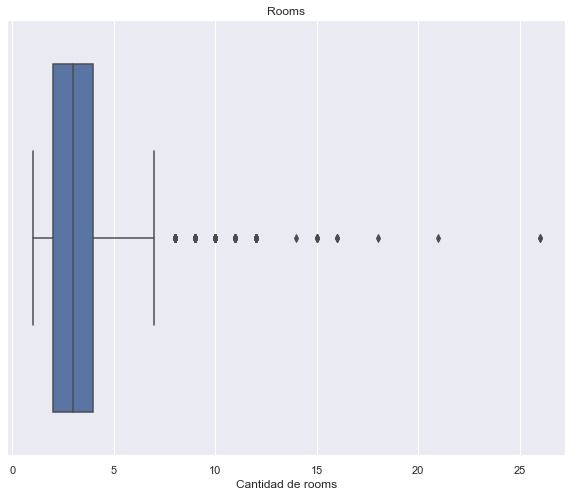

In [64]:
g= sns.boxplot(dff.rooms)
g.set_title('Rooms')
g.set_xlabel('Cantidad de rooms')

Como era de esperarse no hay observaciones con 0 rooms, ya que seria ilogico, esta vez filtraremos el dataset con maximo 10 habitaciones 

In [65]:
dff = dff[dff['rooms'] < 10]

*Ahora vamos a trabajar con la variable "*bathrooms*" que representa la cantidad de baños de un inmueble*

C:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Cantidad de baños')

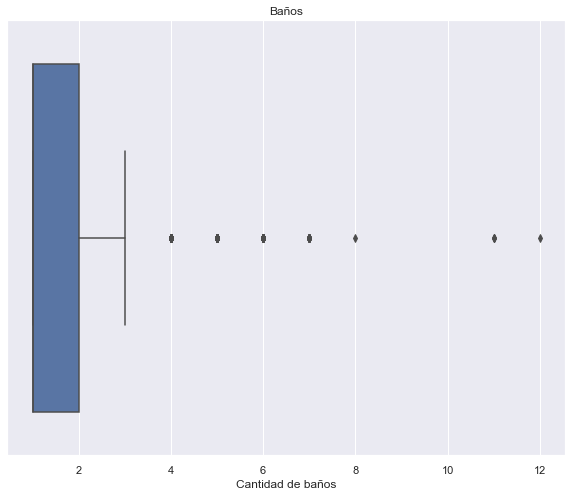

In [66]:
g= sns.boxplot(dff.bathrooms)
g.set_title('Baños')
g.set_xlabel('Cantidad de baños')

Como en la enterior situacion hay valores que nos llaman la atencion, tomaremos hasta 5 baños

In [67]:
dff = dff[(dff["bathrooms"] > 0) & (dff["bathrooms"] < 5)]

Ahora revisaremos la varieble "bedrooms" que representa la cantidad de dormitorios del inmueble

C:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Cantidad de habitaciones')

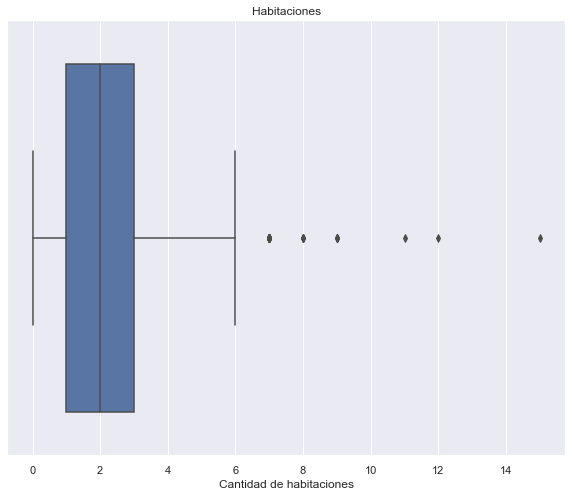

In [68]:
g= sns.boxplot(dff.bedrooms)
g.set_title('Habitaciones')
g.set_xlabel('Cantidad de habitaciones')

Con respecto a esta variable la filtraremos con hatsa 10 habitaciones

In [69]:
dff = dff[dff['bedrooms'] < 10]

Text(0, 0.5, 'Precio')

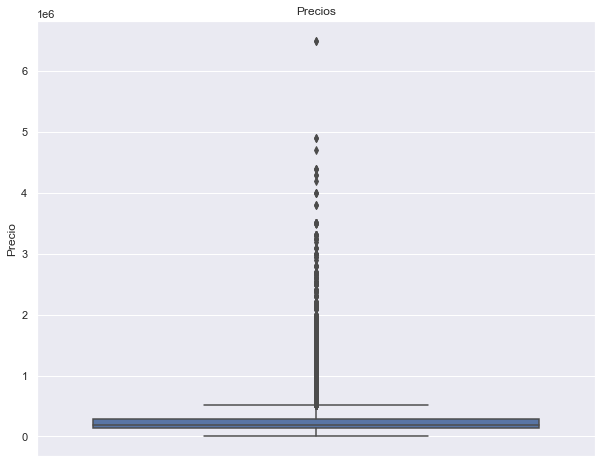

In [70]:
g = sns.boxplot(y=dff["price"])
sns.set(rc={'figure.figsize':(25,20)})
g.set_title('Precios')
g.set_ylabel('Precio')

In [71]:
column = dff["price"]
min_price = column.min()
mean_price = column.mean()
max_price = column.max()
print("El valor minimo de la columna Precio es" ,min_price)
print("El valor mas gran de de la columna Precio es" ,max_price)
print("El promedio de la columna Precio es" ,mean_price)

El valor minimo de la columna Precio es 6000.0
El valor mas gran de de la columna Precio es 6500000.0
El promedio de la columna Precio es 255734.28749027342


Como podemos observar la hay muchos datos atipicos por encima del limite superior (valores hasta 7 millones), vamos a proceder a filtralos hasta 1 millon, ya que no tenemos valores ilogicos como por ejemplo 0 (el menor valor de la variable price es 6000)

In [72]:
dff = dff[dff['price'] < 7000000]
dff.shape

(55261, 19)

Aqui termina nuestro filtrado de datos 

****Chequeamos como quedaron nuestras variables con sus respectivos filtros aplicados****

In [73]:
num_vars = dff.columns[df.dtypes != "object"]
cat_vars = dff.columns[df.dtypes == "object"]
print(num_vars)
print(cat_vars)
# cantidad de missing values
dff[num_vars].isnull().sum().sort_values(ascending=False)

Index(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price'],
      dtype='object')
Index(['start_date', 'end_date', 'created_on', 'l1', 'l2', 'l3', 'currency',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')


lat                2791
lon                2791
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
dtype: int64

Nuestro dataset quedo sin datos faltantes en las variables de nuestro interes,  las variables de lon y lat que representan las coordenadas de el inmueble no son de nuestro interes momentaneamente.

# Relaciones entre variables: vamos a usar un scatterplot para ver como las relaciones entre varibles

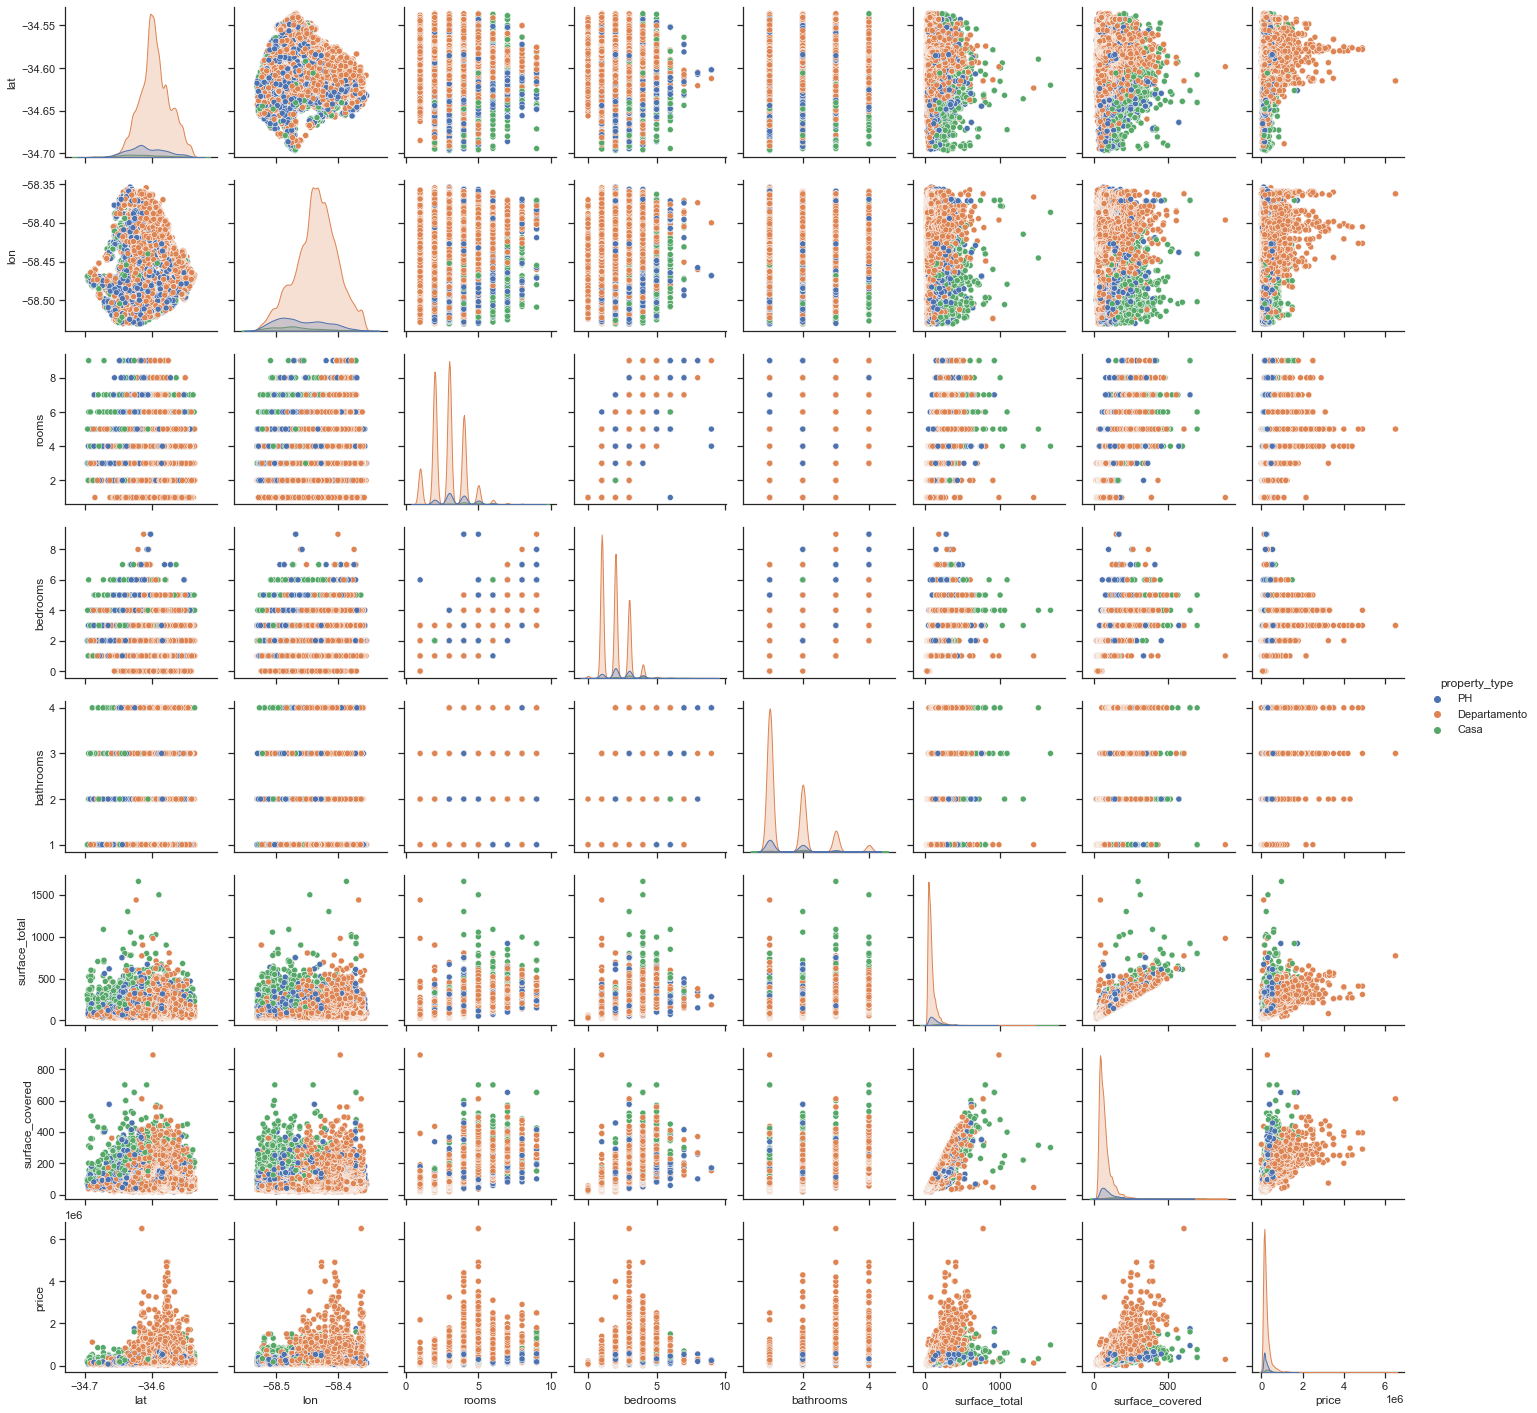

In [74]:
sns.set_theme(style="ticks")

df = dff
sns.pairplot(df, hue="property_type")

En este grafico se pueden observar las relaciones de todas las variables entre si, cada color representa un tipo de propiedad (esto lo logramos a través del parametro hue) asi queda mucho mas entendible el gráfico, podemos ver tendencias lineales entre las variables `surface_total` y `surface_covered` y tambien que estas dos variables a medida que aumentan, la variable `price` tambien por ende estan fuertemente corrrelacioandas (esto es algo obvio porque a medida que crece el inmueble este tendra un valor mas alto)

**Correlaciones:** 
Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [75]:
dff_corr = dff.corr() #Obtenemos las correlaciones de dataset filtrado
mask = np.triu(dff_corr) #una mascara para obtener una matrix triangular

In [76]:
df_no_corr = df_no.corr() #Obtenemos las correlaciones del dataset sin filtrar

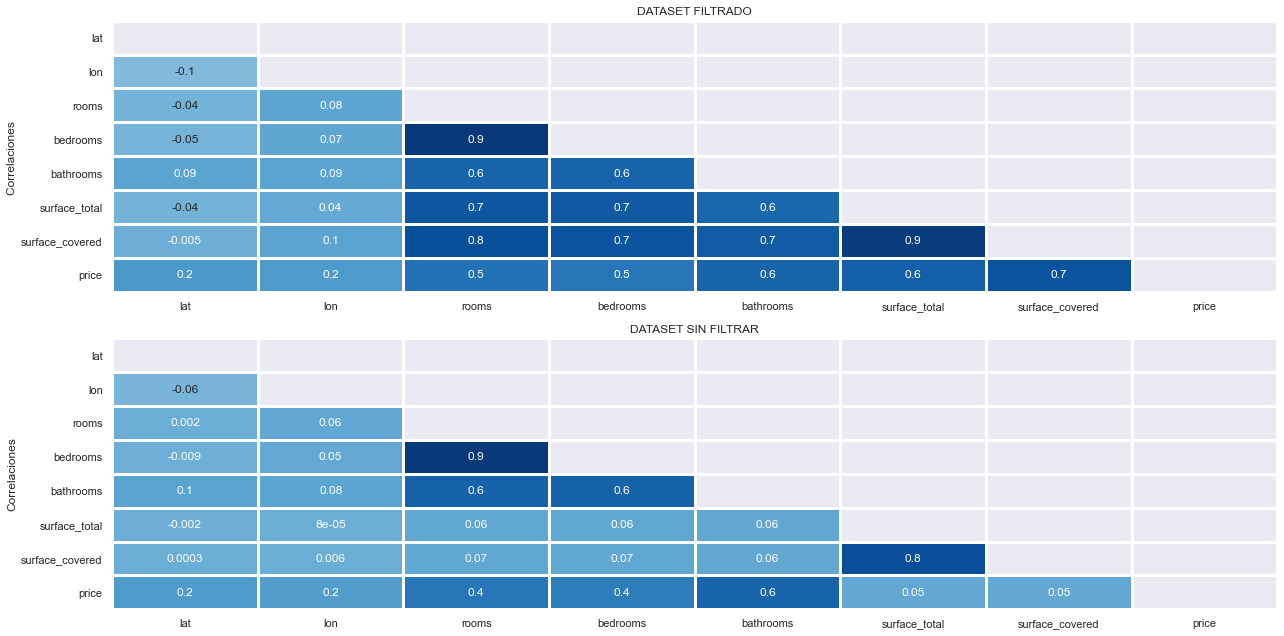

In [136]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(18,9))

for i,d in enumerate([dff_corr, df_no_corr]):
   
    labels = d.applymap(lambda v: str(v) if v == d.values.max() else '')
    sns.heatmap(d, annot=True, fmt=".1g", cbar=False,
            vmin=-1.0, vmax=1.0, linecolor="w", center=0, mask=mask, linewidths=3, cmap = "Blues", ax=ax[i],
)
    
ax[0].set_title("DATASET FILTRADO")
ax[1].set_title("DATASET SIN FILTRAR")
ax[0].set_ylabel('Correlaciones ')
ax[1].set_ylabel('Correlaciones')
ax[0].set_xlabel('')

plt.tight_layout()
plt.savefig('final.png', dpi=120)

**Este grafico representa las dos caras de nuestro dataset, en primer lugar se presenta la matriz triangular inferior de las correlaciones de cada pareja de variables, de ambos datasets. Preferimos obviar la diagonal porque no nos es de utilidad (la correlacion de una variable consigo misma es del 100%). Algo a resaltar es que luego de nuestro filtrado, las correlaciones de las variables: "surface_total" y "surface_covered" tienen una correlacion mucho mas alta, mas del 100% en ambos casos, con respecto a nuestra variable de interes "price", esto quiere decir que ambas logran explicar mejor la variable "price". Las demas variables tambien presentan mejorias del 10% "rooms" y "bedrooms" y "bathrooms" se mantiene constante**  

# Reflexiones despues del filtrado

***Luego del filtrado que aplicamos queda en evidencia que***
<br/>
El dataset por si solo esta lleno de outliers y  datos faltantes lo que dificulta mucho la vizualizacion de los datos y a fututro nos llevera a tener muy malos resultados en los modelos de Machine Learning
<br/>
Si observamos nuestra variable Price las correlaciones aumentan considerablemente con respecto al grafico del primer dataset ya que hicimos un tratamiento de outliers 

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.
<br/>
**Mi pregunta seria que puede ser respondida con este dataset seria: Cual es el barrio con el metro cuadrado mas caro**
<br/>
**Luego me planteria la siguiente pregunta, que puede ser respondida con un data set externo seria con respecto a la seguridad que brindan los barrios mas caros
¿Los barrios mas caros de Buenos Aires son los mas seguros? o los delincuentes prefieren delinquir en barrios con gente mas adinerada (teniendo en cuenta que los barrios mas caros estan habitados por gente con mas dinero que los demas)
**
<br/>
¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)
<br/>
**Si tenemos en cuenta que el dataset tiene publicaciones a partir del 2017, buscare un dataset de delitos de esa fecha**
<br/>
¿Necesitas información complementaria?¿Cómo la obtendrías?
<br/>
**Si necesito ams informacion acerca de los delitos, la cual encontre basicamente por google en la pagina oficial de datos de Buenos**
<br/>
Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


# DESAFIO 2.1 ¿Cual es el barrio mas caro en Capital Federal por m2?

Primero vamos a calcular el valor de m2

In [78]:
#Barrios mas caros
dff[['surface_total', 'price']] = dff[['surface_total', 'price']]
dff['m2_price'] = dff['price']/dff['surface_total']
round(dff['m2_price'], 2)

1         2271.43
3         3470.59
8         1977.78
9         1977.78
10        2575.76
           ...   
146552    3389.94
146553    5849.06
146554    3257.14
146555    3333.33
146556    1671.92
Name: m2_price, Length: 55261, dtype: float64

In [79]:
data_barrios = pd.DataFrame(dff[['l3', 'm2_price']])
data_barrios.head()
#Armamos un dataset con el barrio y el precio de m2

l3     m2_price
1              Boedo  2271.428571
3            Palermo  3470.588235
8   Parque Patricios  1977.777778
9   Parque Patricios  1977.777778
10  Villa Pueyrredón  2575.757576

Ahora vamos a vizualizar los precios de m2 en promedio de cada barrio de Capital Federal

Text(0, 0.5, 'Barrio')

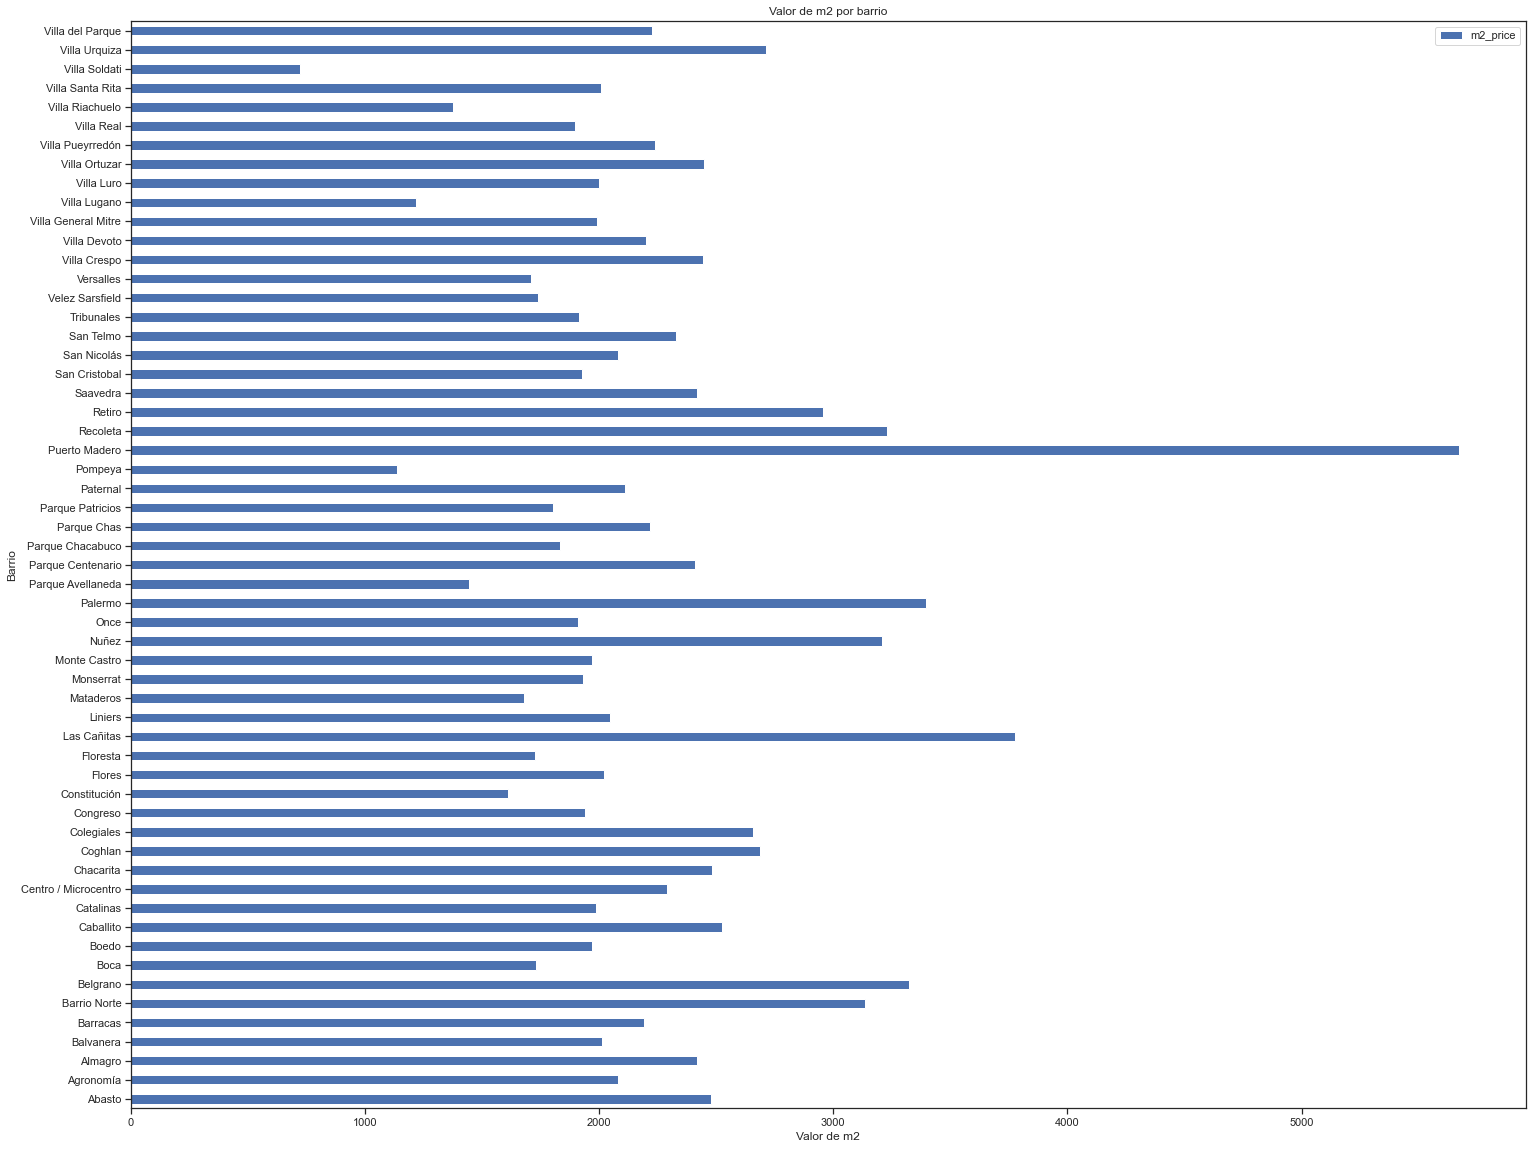

In [80]:
barrios = dff.groupby(['l3'])[['m2_price']].mean().plot(kind="barh")
sns.set(rc={'figure.figsize':(25,20)})
barrios.set_title('Valor de m2 por barrio')  
barrios.set_xlabel('Valor de m2')
barrios.set_ylabel("Barrio")

Luego de graficar podemos observar que los barrios mas caros son: Puerto Maderos, Palermo, Recoleta, Belgrano y Nuñez

# Ahora vamos a echar un vistaso al dataframe de Delitos 2017 que conseguimos en la pagina oficial de datos de la Provinvcia de Buenos Aires
El dataset se puede obtener desde este link https://data.buenosaires.gob.ar/dataset/delitos/resource/217cf8ce-d4bc-477e-ab5a-173e9393478d

In [81]:
df_delitos2017 = pd.read_csv(r"C:\Users\Tomás.r3\Desktop\DATA SCIENCE\SPRINT PROYECT\delitos_2017.csv")
df_delitos2017.head(15)
df_delitos2017 = df_delitos2017.rename(columns={'barrio': 'l3'})

Text(0, 0.5, 'Barrio')

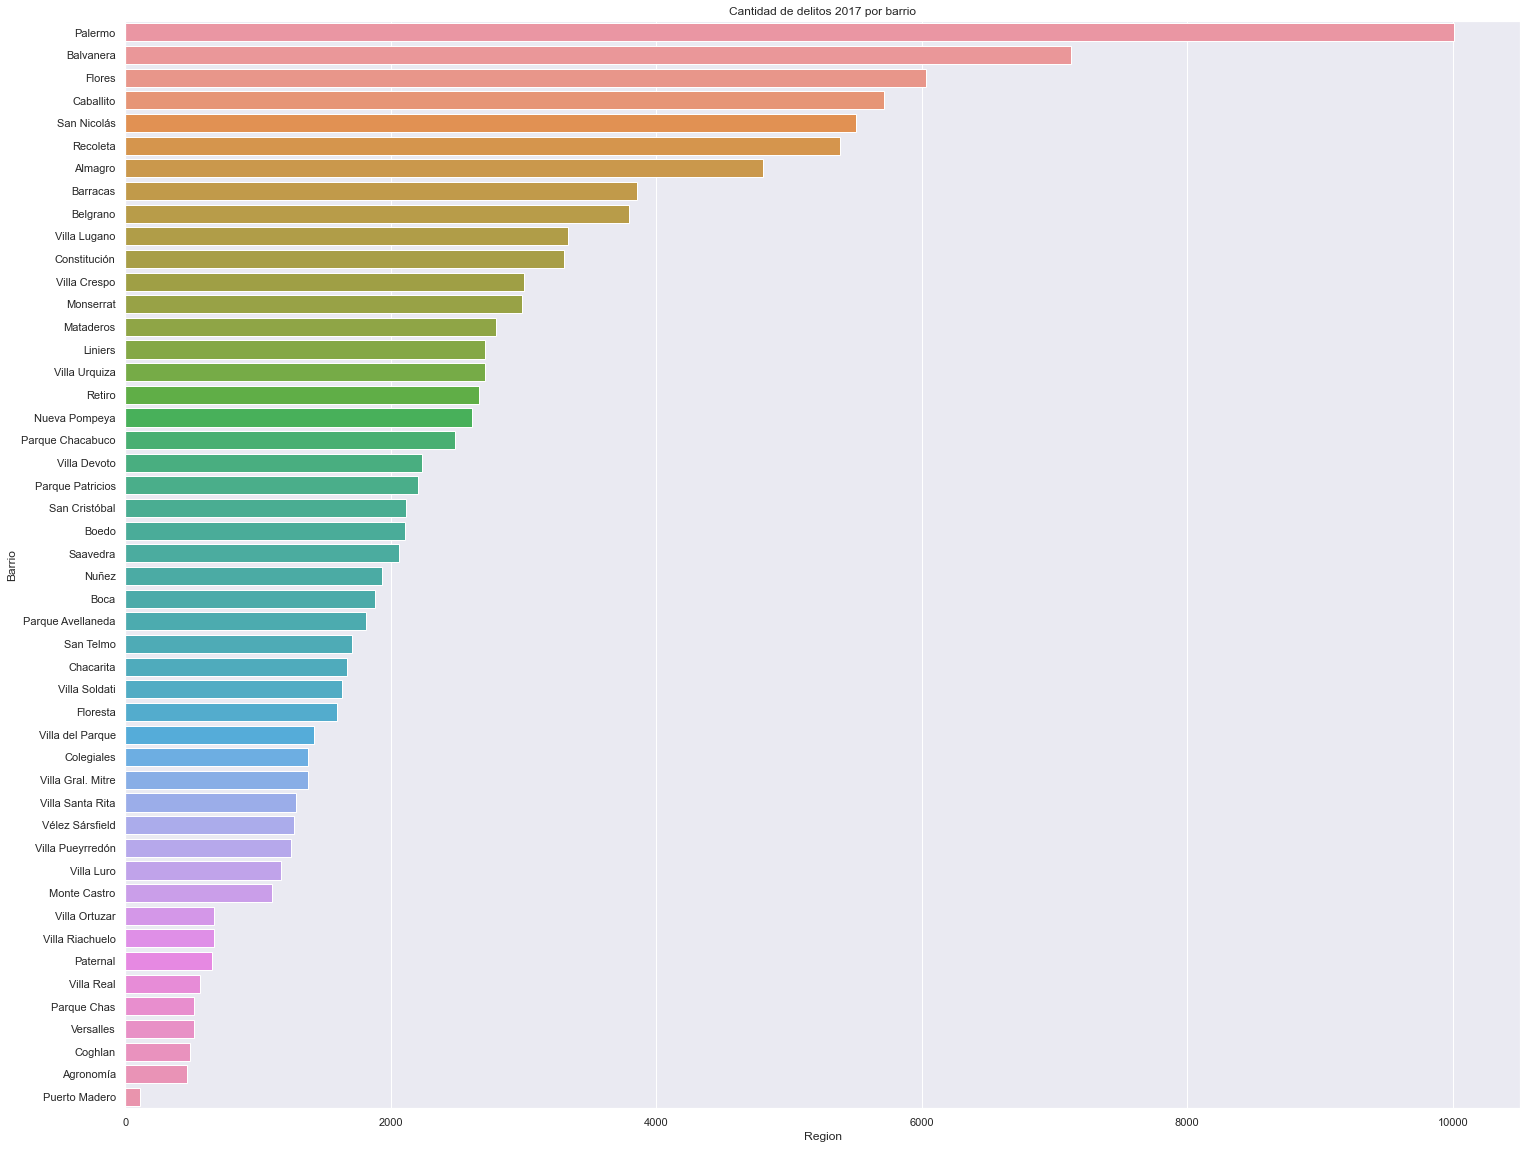

In [82]:
delitos= sns.countplot( y='l3', data=df_delitos2017, orient = "h", order = df_delitos2017["l3"].value_counts().index)
sns.set(rc={'figure.figsize':(25,20)})
delitos.set_title('Cantidad de delitos 2017 por barrio')  
delitos.set_xlabel('Region')
delitos.set_ylabel("Barrio")

En base a estos datos podemos responder que: *Puerto Madero siendo uno de los barrios mas caros*, es el que *menos delitos tiene por ende el mas seguro*,
aunque tambien Palermo (el segundo barrio mas caro) es la zona donde se cometieron mas delitos en 2017 y al parecer junto con Recoleta son los unicos dos barrios mas caros con altos indices de delito.
<br/>
Para concluir podemos responder que a excepcion de Palermo y Recoleta los barrios mas caros de Capital Federal son seguros en cuanto a Delitos cometidos en 2017, ademas por razones que desconocemos la zona de Palermo y Recoleta es la preferida de los delincuentes como habiamos mencinado anteriormente para delinquir

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

**Cargamos el dataset y realizamos el filtrado**

In [83]:
    df = pd.read_csv (r'C:\Users\Tomás.r3\Desktop\DATA SCIENCE\SPRINT PROYECT\DS_Proyecto_01_Datos_Properati.csv')
    dff = pd.DataFrame (df[df.property_type.isin(["Departamento", "PH", "Casa"])
                      & (df.l2 == "Capital Federal")])
    dff = dff[(dff.surface_total <= 1000) & (dff.surface_total >= 15)]
    dff = dff[(df.price <= 4000000)]
    dff = dff[["rooms", "surface_covered", "surface_total",  "bedrooms", "bathrooms", "price"]]
    dff = dff.dropna()
    dff.shape

<ipython-input-83-8d946d936fce>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dff = dff[(df.price <= 4000000)]


(81019, 6)

**Checkpoint** 

In [84]:
# Importamos los paquetes necesarios:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

In [85]:
'''
Elegimos las variables predictoras
nuestra X son todas las columnas excepto price
nuestra y es price ya que es lo que queremos predecir
'''
X = dff.drop("price", axis=1)
y = dff.price

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Particiones entrenamiento & testeo**

In [87]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(54282, 5)
(26737, 5)
(54282,)
(26737,)


Nuestro modelo benchmar sera una regresion lineal

In [88]:
lineal_regression = LinearRegression()
regression = DecisionTreeRegressor(max_depth=12, min_samples_split=2, min_samples_leaf=2, random_state=3)
knn_regressor = KNeighborsRegressor(n_neighbors=3)

**Modelos de ML KNN**


La metrica que vamos a utilizar para medir el error de nuestros modelos es el RMSE o la Raiz del Error Cuadratico promedio.
RMSE o root mean square error; nos dice cual es la distancia entre los valores predichos y los valores reales del dataset, la ventaja de usar esta metrica es que se expresa en unidades con las que estemos trabajando, en este caso, con unidades monetarias. 
<br/>
En este caso se busca reducir el RSME. Cuanto más pequeño es un valor RMSE, más cercanos son los valores predichos y observados. Por ende 
mejor el modelo

Inicializamos los modelos con los que vamos a trabajar

In [89]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=12, min_samples_split=2, min_samples_leaf=2, random_state=3)
knn_regressor = KNeighborsRegressor(n_neighbors=3)

Fiteamos los modelos

In [90]:
knn_regressor.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
linear_model.fit(X_train, y_train)

LinearRegression()

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199092.3434994141
Raíz del error cuadrático medio en Test: 202375.15859869527


C:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


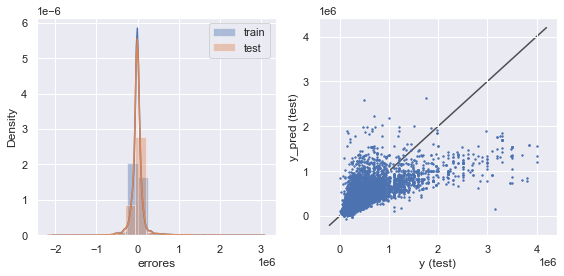

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 103357.06934593183
Raíz del error cuadrático medio en Test: 148694.97180848


C:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


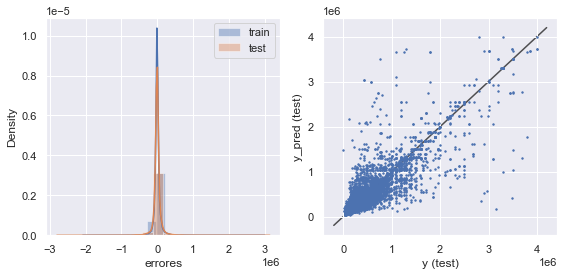

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 104810.85380764061
Raíz del error cuadrático medio en Test: 152696.78053773884


C:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


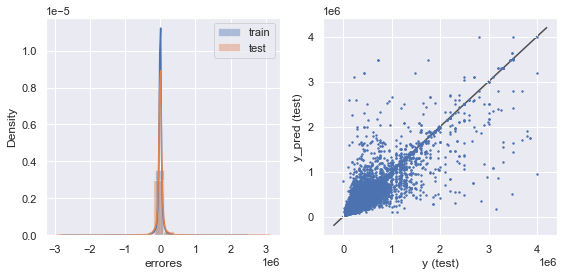

In [91]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']
for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    plt.figure(figsize = (8,4))
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.tight_layout()
    plt.show()

**Mejorando el desempeño de los modelos optimizando hiperparametros**

In [92]:
rmse_val = [] #to store rmse values for different k

for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value para k = ' , K , 'es:', error)

RMSE value para k =  1 es: 162246.70418442567
RMSE value para k =  2 es: 151687.16091538273
RMSE value para k =  3 es: 152696.78053773884
RMSE value para k =  4 es: 155045.80472215713
RMSE value para k =  5 es: 156247.2660159378
RMSE value para k =  6 es: 158705.47354607598
RMSE value para k =  7 es: 159830.2549760562
RMSE value para k =  8 es: 160766.1570489096
RMSE value para k =  9 es: 162085.76996389695
RMSE value para k =  10 es: 162609.43032524065
RMSE value para k =  11 es: 163189.61183552642
RMSE value para k =  12 es: 164063.6382304685
RMSE value para k =  13 es: 165007.32091036407
RMSE value para k =  14 es: 165963.07532283934
RMSE value para k =  15 es: 166986.3665163104
RMSE value para k =  16 es: 167669.57739353573
RMSE value para k =  17 es: 167989.0030176871
RMSE value para k =  18 es: 168434.146446075
RMSE value para k =  19 es: 168939.49802715084
RMSE value para k =  20 es: 169338.41584230433


<AxesSubplot:title={'center':'Valores de RMSE para cada K'}, xlabel='K Vecinos', ylabel='RMSE'>

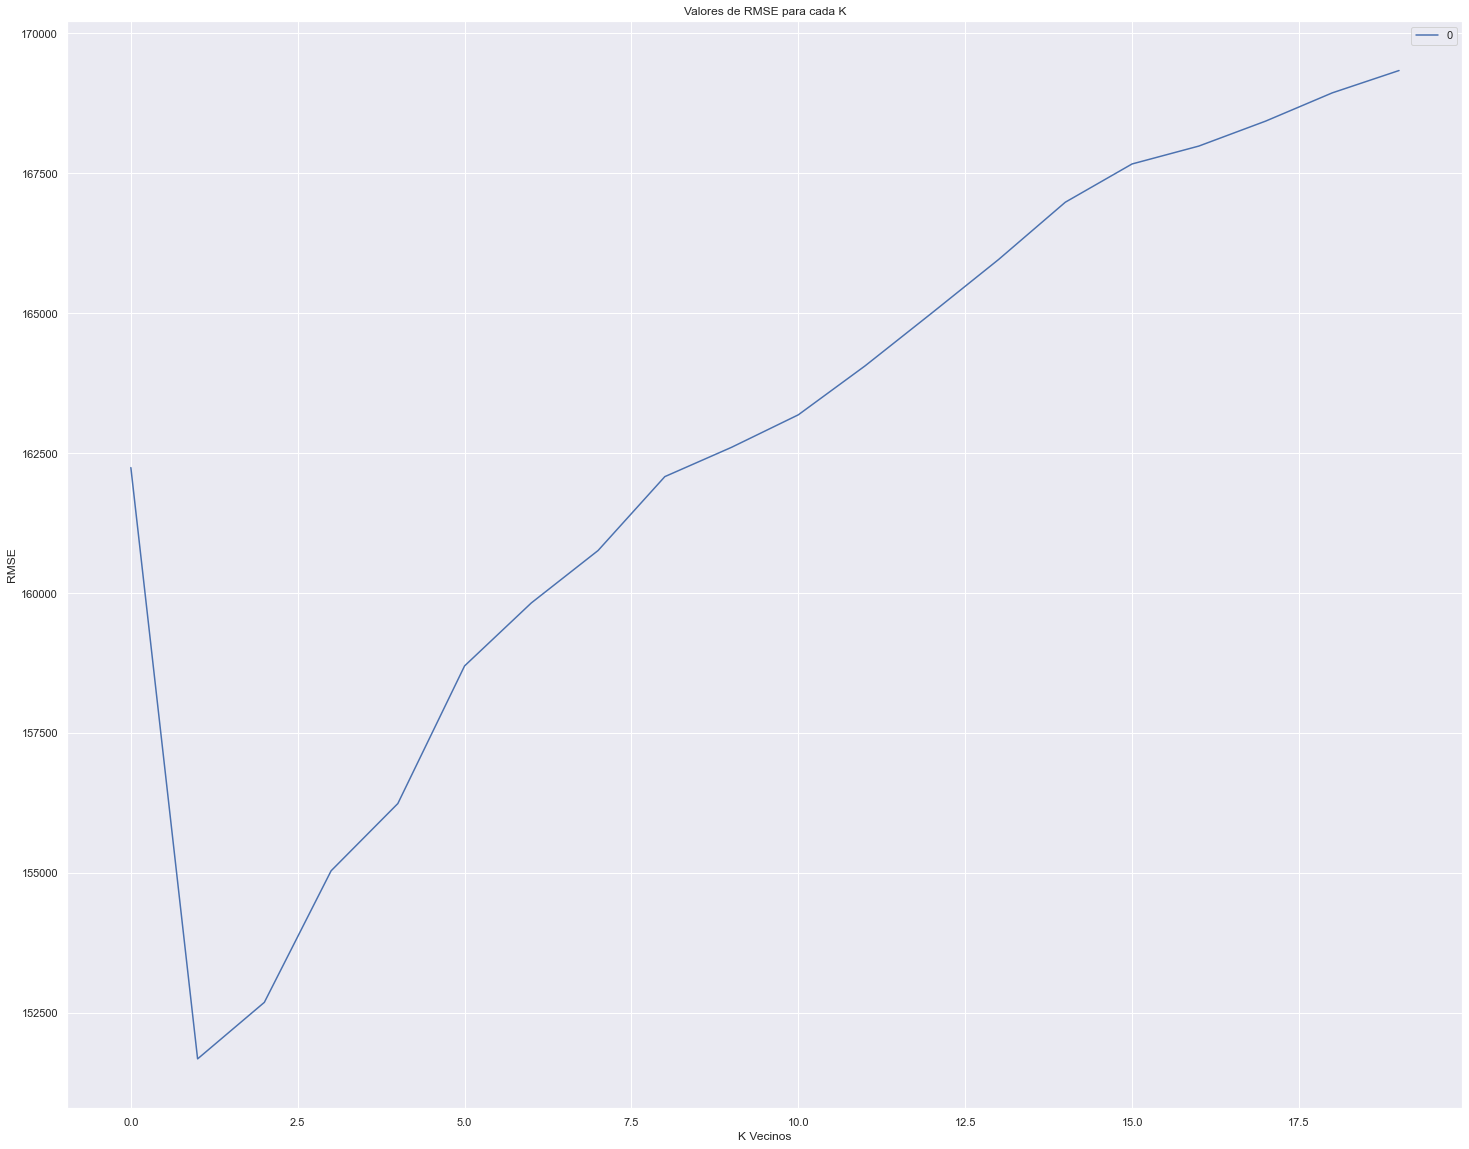

In [93]:
#trazamos los valores rmse frente a los valores k
curva = pd.DataFrame(rmse_val)
curva.plot(xlabel="K Vecinos", ylabel="RMSE", title = "Valores de RMSE para cada K")

Decidimos quedarnos con el k = 2

In [94]:
knn_regressor_tunned = KNeighborsRegressor(n_neighbors=2)

*****OPTIMIZANDO EL ARBOL DE DECISION*****


In [95]:
lista_rmse = []

for depth in range(20):
  depth = depth + 1 # para no usar un K de 0 y llegar a 19
  tree = DecisionTreeRegressor(max_depth = depth)
  tree.fit(X_train, y_train)
  y_pred = tree.predict(X_test)
  error = sqrt(mean_squared_error(y_test, y_pred))
  lista_rmse.append(error)
  print("El valor de RMSE para la profundidad =", depth, "es: ", error)

El valor de RMSE para la profundidad = 1 es:  236608.11567911558
El valor de RMSE para la profundidad = 2 es:  209760.43848144816
El valor de RMSE para la profundidad = 3 es:  195192.57917049743
El valor de RMSE para la profundidad = 4 es:  184392.2959878134
El valor de RMSE para la profundidad = 5 es:  174934.0588630955
El valor de RMSE para la profundidad = 6 es:  166461.35409018665
El valor de RMSE para la profundidad = 7 es:  160211.29870362752
El valor de RMSE para la profundidad = 8 es:  156769.9288793749
El valor de RMSE para la profundidad = 9 es:  154356.33454506495
El valor de RMSE para la profundidad = 10 es:  153757.81981737405
El valor de RMSE para la profundidad = 11 es:  148715.70906869342
El valor de RMSE para la profundidad = 12 es:  149791.75302292765
El valor de RMSE para la profundidad = 13 es:  148956.6387694836
El valor de RMSE para la profundidad = 14 es:  147377.15510491922
El valor de RMSE para la profundidad = 15 es:  146306.3698619167
El valor de RMSE para la

<AxesSubplot:title={'center':'Valores de RMSE para cada K'}, xlabel='Profundidad', ylabel='RMSE'>

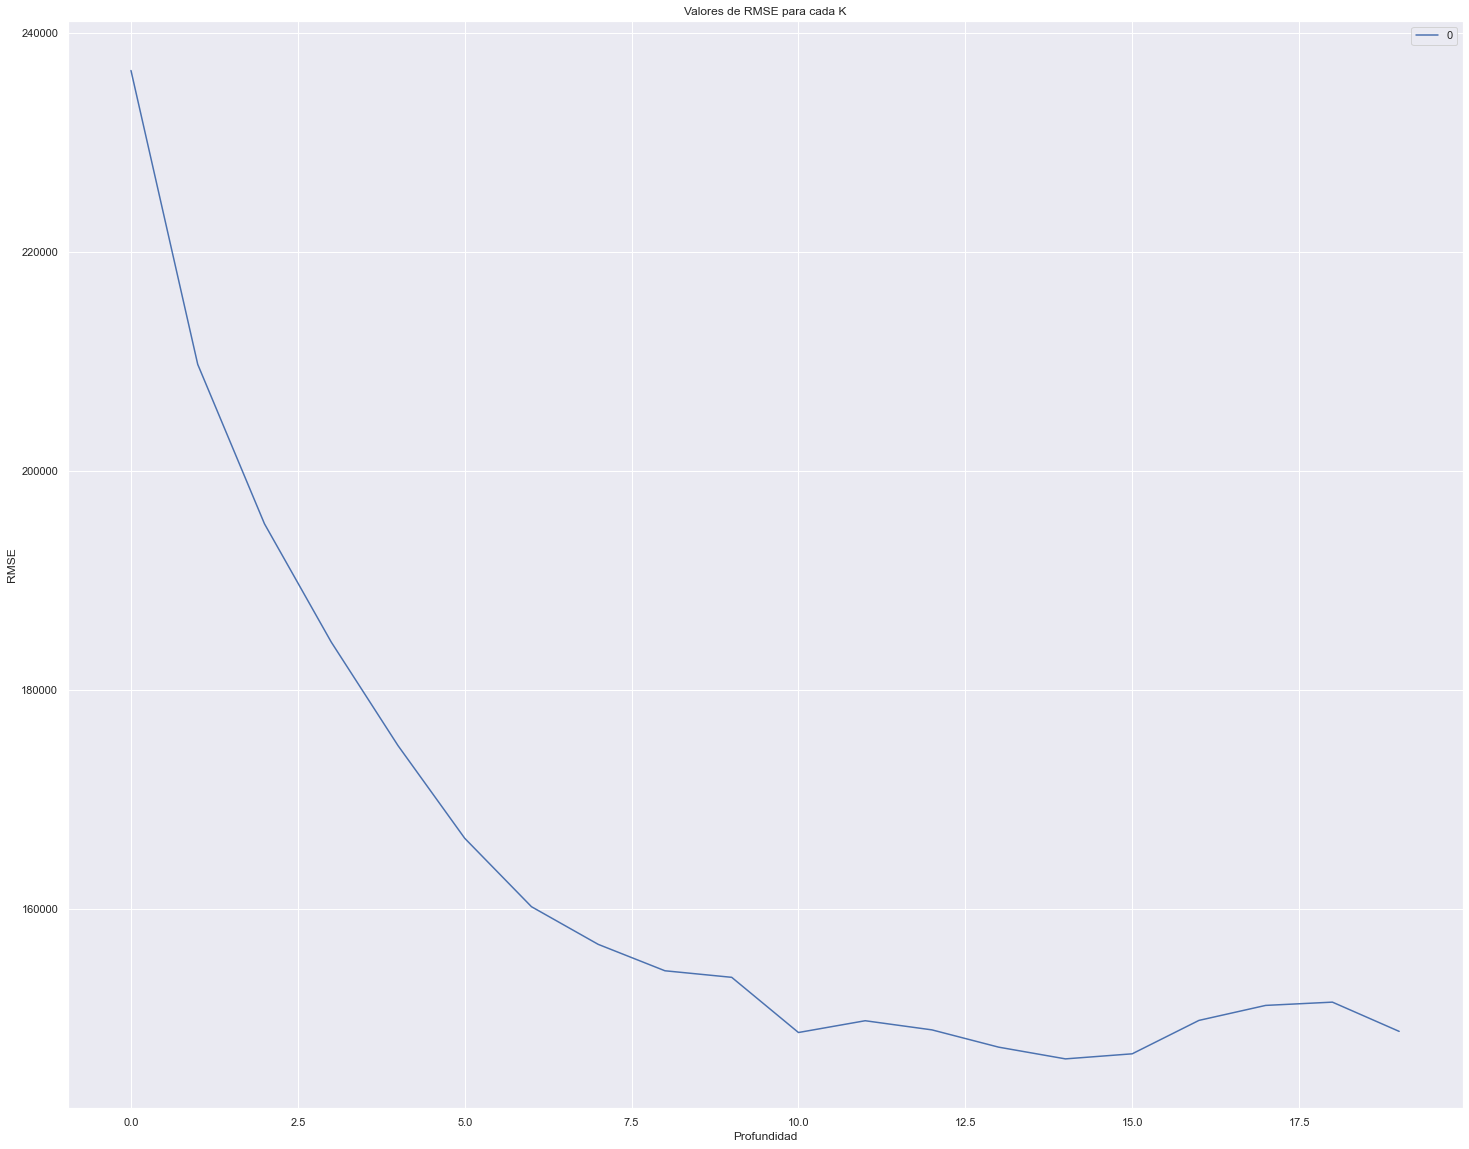

In [96]:
#trazamos los valores rmse frente a los valores k
curve = pd.DataFrame(lista_rmse) #elbow curve 
curve.plot(xlabel="Profundidad", ylabel="RMSE", title = "Valores de RMSE para cada K")

Decisimos quedarnos con la profundida 15

In [97]:
tree_regressor_tunned = DecisionTreeRegressor(max_depth=15, min_samples_split=2, min_samples_leaf=2, random_state=3)
#inicializamos el modelo con la profundida 15

fiteamos los modelos con los hiperparametros optimizados


In [98]:
knn_regressor_tunned.fit(X_train, y_train)
tree_regressor_tunned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=2, random_state=3)

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 199092.3434994141
Raíz del error cuadrático medio en Test: 202375.15859869527


C:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


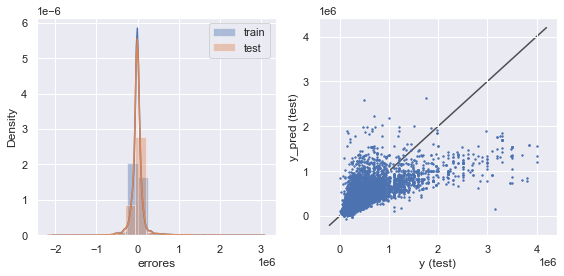

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 85250.73273785863
Raíz del error cuadrático medio en Test: 146620.63942554145


C:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


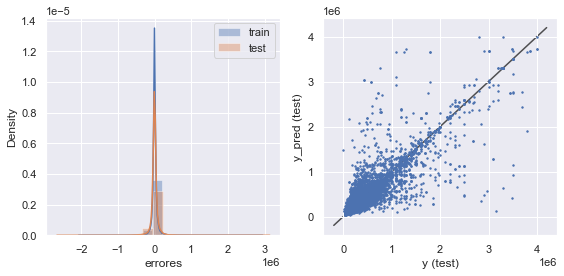

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 90458.08147237766
Raíz del error cuadrático medio en Test: 151687.16091538273


C:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


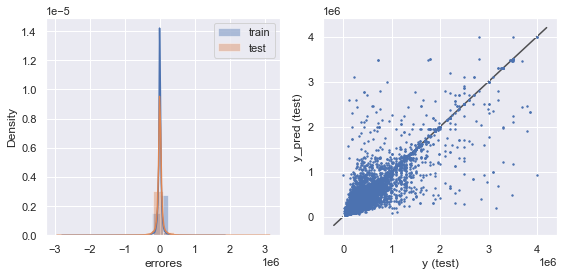

In [99]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']
for i, model in enumerate([linear_model, tree_regressor_tunned, knn_regressor_tunned]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    plt.figure(figsize = (8,4))
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.tight_layout()
    plt.show()


Si comparamos los resultados de RMSE que obtuvimos con los parametros iniciales que elegi podemos observar un decenso con los parametros con los que nos quedamos

# Cierre

Para concluir el proyecto voy a decir que tal vez no use las mejores herramientas con respecto a los outliers porque los podriamos haber tratado de alguna forma
y creo que tambien los modelos de machine learning que utilizamos no eran tal vez los mejores, pero logramos poder optimizarlos a través de los hiperparametros. Cabe recalcar que siendo uno de los primeros proyectos en Data Science me voy contento de plasmar en el notebook.

**Respecto a los modelos, el que mejor logro predecir los precios fue el arbol de decision, porque tuvo menores valores de RMSE en entrenamiento (103357.069) y en testeo (148694.971) mucho mejor que los demas modelos, ya que como mencionamos anteriormente, el RMSE 
mide la cantidad de error entre dos conjuntos y el modelo de arbol de decision fue el que tuvo menor RMSE.**

No encuentro fallas en los modelos, al contrario son muy buenos para empezar, cabe mencionar que son modelos de clasificacion adaptados para relizar regresion entonces no son los mejores para predecir un valor

____________________________________________________________________________________________________________________________________________

# Proyecto 2

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt


warnings.filterwarnings(action="ignore")
pd.set_option("float_format", '{:.2f}'.format)

Importamos nuestro dataset

In [2]:
data_p2 = pd.read_csv (r"C:\Users\Tomás.r3\Desktop\DATA SCIENCE\SPRINT PROYECT II\DS_Proyecto_01_Datos_Properati.csv")

Apartamos las variables que no nos interesan

In [3]:
data_p2 = pd.DataFrame (data_p2[data_p2.property_type.isin(["Departamento", "PH", "Casa"])
                    & (data_p2.l2 == "Capital Federal")])
data_p2 = data_p2[["lat", "lon", "rooms", "surface_covered", "surface_total",  "bedrooms", "bathrooms", "property_type", "price"]]
#separamos las variables de localizacion para luego usarlas en el clustering

In [4]:
data_p2

lat    lon  rooms  surface_covered  surface_total  bedrooms  \
0      -34.61 -58.38   7.00           140.00         140.00      7.00   
1      -34.62 -58.41   2.00            58.00          70.00      1.00   
2      -34.59 -58.43   2.00            45.00          45.00      1.00   
3      -34.58 -58.44   2.00            50.00          85.00      1.00   
5      -34.59 -58.44   2.00            56.00          56.00      1.00   
...       ...    ...    ...              ...            ...       ...   
146554 -34.59 -58.43   4.00           111.00         175.00      3.00   
146555 -34.59 -58.43   3.00           134.00         144.00      2.00   
146556 -34.58 -58.44   4.00           143.00         317.00      2.00   
146557 -34.58 -58.42   3.00           145.00         145.00      2.00   
146558    NaN    NaN   4.00           210.00         220.00      3.00   

        bathrooms property_type      price  
0            2.00  Departamento  153000.00  
1            2.00            PH  159000.00  
2            1.00            PH  125000.00  
3            1.00            PH  295000.00  
5            1.00            PH  150000.00  
...           ...           ...        ...  
146554       3.00            PH  570000.00  
146555       2.00            PH  480000.00  
146556       2.00            PH  530000.00  
146557       2.00  Departamento  420000.00  
146558       5.00  Departamento 1470000.00  

[91485 rows x 9 columns]

## Aplicamos la regla del rango intercuartilico para el tratamiento de ouliers
Vamos a aplicar el metodo del rango intercuartilico para la deteccion y eliminacion de outliers,
<br/>
porque esta detecta como outlier a los datos fuera de los bigotes del boxplot que representa la distribucion de los datos

## Variable surface total

Text(0, 0.5, 'Metros cuadrados')

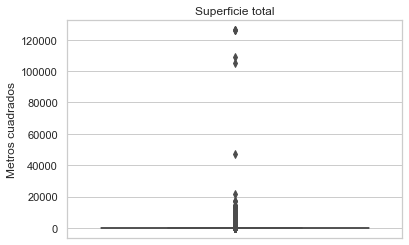

In [5]:
sns.set_theme(style="whitegrid")
g = sns.boxplot(y=data_p2["surface_total"])
sns.set(rc={'figure.figsize':(10,8)})
g.set_title('Superficie total')
g.set_ylabel('Metros cuadrados')

In [6]:
#Rango intercuartilico para trtar outliers


Q1 = data_p2.surface_total.quantile(0.25)
Q3 = data_p2.surface_total.quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)


data_p2= data_p2[data_p2.surface_total > Lower_Fence]
data_p2 = data_p2[data_p2.surface_total < Upper_Fence]


Text(0, 0.5, 'Metros cuadrados')

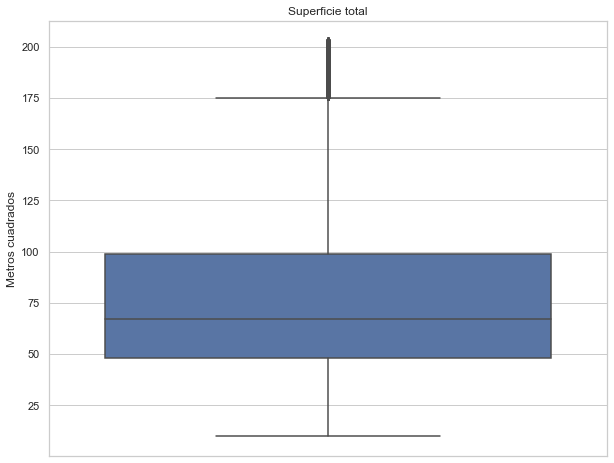

In [7]:
sns.set_theme(style="whitegrid")
g = sns.boxplot(y=data_p2["surface_total"])
sns.set(rc={'figure.figsize':(10,8)})
g.set_title('Superficie total')
g.set_ylabel('Metros cuadrados')

## Variable surface_covered

Text(0, 0.5, 'Metros cuadrados')

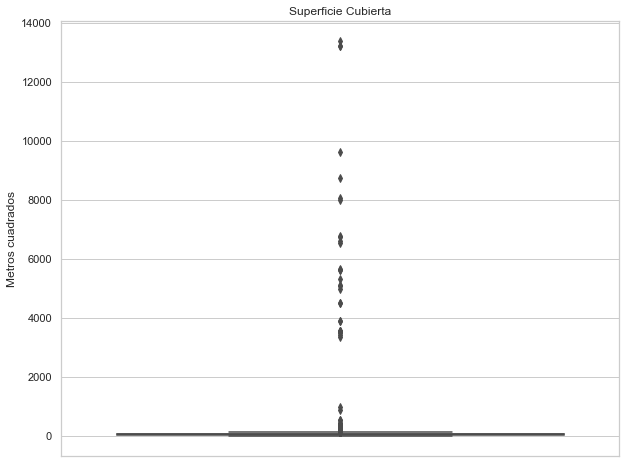

In [8]:
sns.set_theme(style="whitegrid")
g = sns.boxplot(y=data_p2["surface_covered"])
sns.set(rc={'figure.figsize':(10,8)})
g.set_title('Superficie Cubierta')
g.set_ylabel('Metros cuadrados')

In [9]:
#Rango intercuartilico para trtar outliers


Q1 = data_p2.surface_covered.quantile(0.25)
Q3 = data_p2.surface_covered.quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)


data_p2= data_p2[data_p2.surface_covered > Lower_Fence]
data_p2 = data_p2[data_p2.surface_covered < Upper_Fence]


Text(0, 0.5, 'Metros cuadrados')

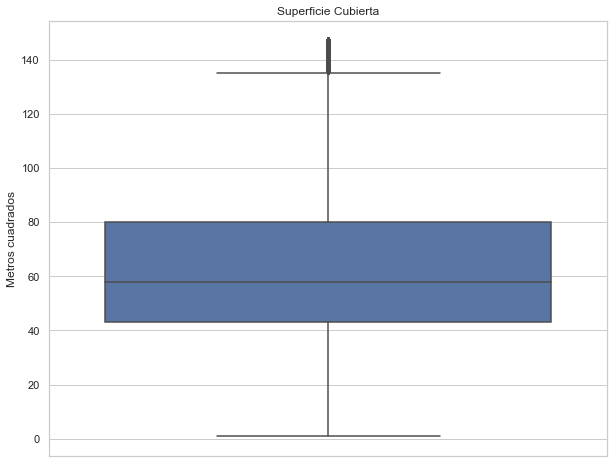

In [10]:
sns.set_theme(style="whitegrid")
g = sns.boxplot(y=data_p2["surface_covered"])
sns.set(rc={'figure.figsize':(10,8)})
g.set_title('Superficie Cubierta')
g.set_ylabel('Metros cuadrados')

## Variable bathrooms

Text(0, 0.5, 'Cantidad de Baños')

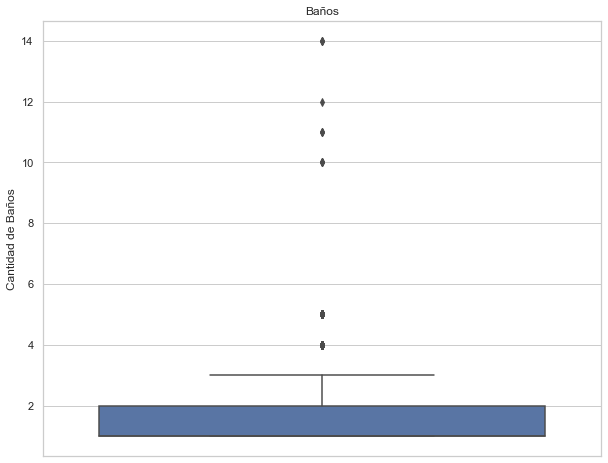

In [11]:
sns.set_theme(style="whitegrid")
g = sns.boxplot(y=data_p2["bathrooms"])
sns.set(rc={'figure.figsize':(10,8)})
g.set_title('Baños')
g.set_ylabel('Cantidad de Baños')

In [12]:
#Rango intercuartilico para trtar outliers


Q1 = data_p2.bathrooms.quantile(0.25)
Q3 = data_p2.bathrooms.quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)


data_p2= data_p2[data_p2.bathrooms > Lower_Fence]
data_p2 = data_p2[data_p2.bathrooms < Upper_Fence]


Text(0, 0.5, 'Cantidad de Baños')

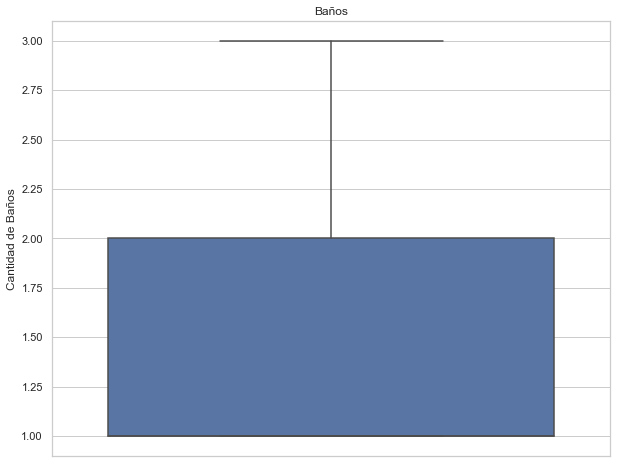

In [13]:
sns.set_theme(style="whitegrid")
g = sns.boxplot(y=data_p2["bathrooms"])
sns.set(rc={'figure.figsize':(10,8)})
g.set_title('Baños')
g.set_ylabel('Cantidad de Baños')

## Variable rooms

Text(0, 0.5, 'Cantidad de Rooms')

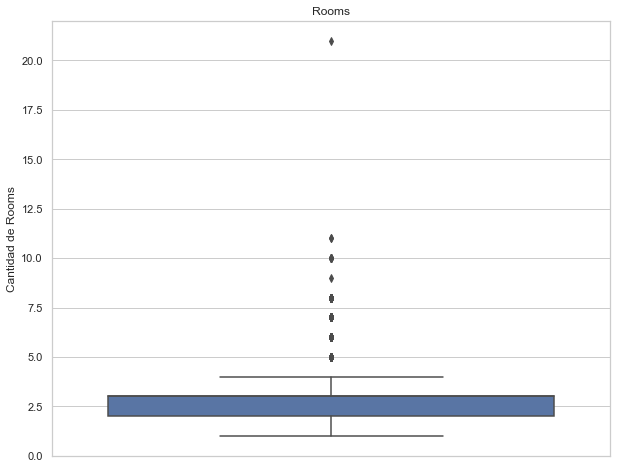

In [14]:
sns.set_theme(style="whitegrid")
g = sns.boxplot(y=data_p2["rooms"])
sns.set(rc={'figure.figsize':(10,8)})
g.set_title('Rooms')
g.set_ylabel('Cantidad de Rooms')

In [15]:
#Rango intercuartilico para trtar outliers


Q1 = data_p2.rooms.quantile(0.25)
Q3 = data_p2.rooms.quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)


data_p2= data_p2[data_p2.rooms > Lower_Fence]
data_p2 = data_p2[data_p2.rooms < Upper_Fence]

Text(0, 0.5, 'Cantidad de Rooms')

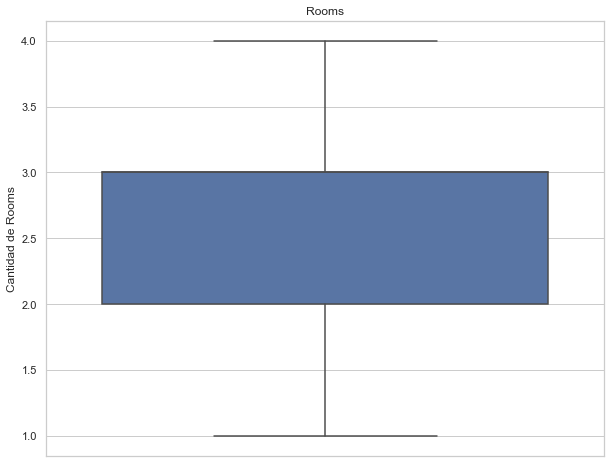

In [16]:
sns.set_theme(style="whitegrid")
g = sns.boxplot(y=data_p2["rooms"])
sns.set(rc={'figure.figsize':(10,8)})
g.set_title('Rooms')
g.set_ylabel('Cantidad de Rooms')

## Variable bedrooms

Text(0, 0.5, 'Cantidad de bedrooms')

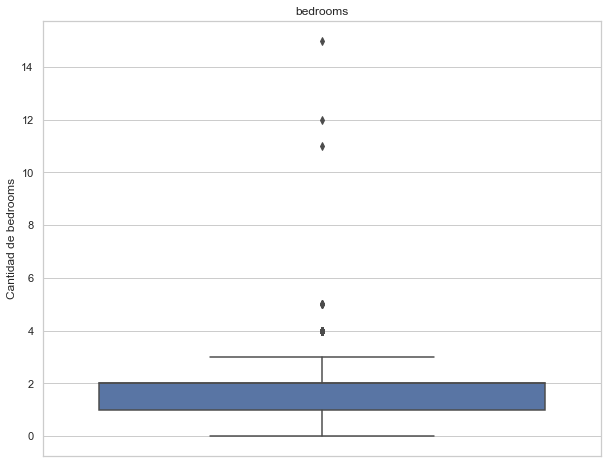

In [17]:
sns.set_theme(style="whitegrid")
g = sns.boxplot(y=data_p2["bedrooms"])
sns.set(rc={'figure.figsize':(10,8)})
g.set_title('bedrooms')
g.set_ylabel('Cantidad de bedrooms')

In [18]:
#Rango intercuartilico para trtar outliers


Q1 = data_p2.bedrooms.quantile(0.25)
Q3 = data_p2.bedrooms.quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)


data_p2= data_p2[data_p2.bedrooms > Lower_Fence]
data_p2 = data_p2[data_p2.bedrooms < Upper_Fence]

Text(0, 0.5, 'Cantidad de bedrooms')

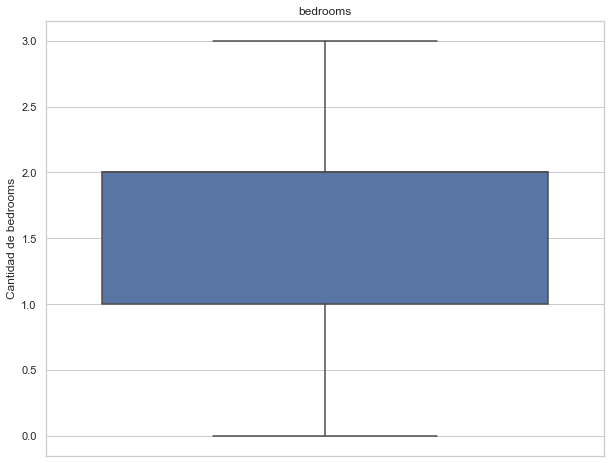

In [19]:
sns.set_theme(style="whitegrid")
g = sns.boxplot(y=data_p2["bedrooms"])
sns.set(rc={'figure.figsize':(10,8)})
g.set_title('bedrooms')
g.set_ylabel('Cantidad de bedrooms')

## Variable price

Text(0, 0.5, 'Precio expresado en USD')

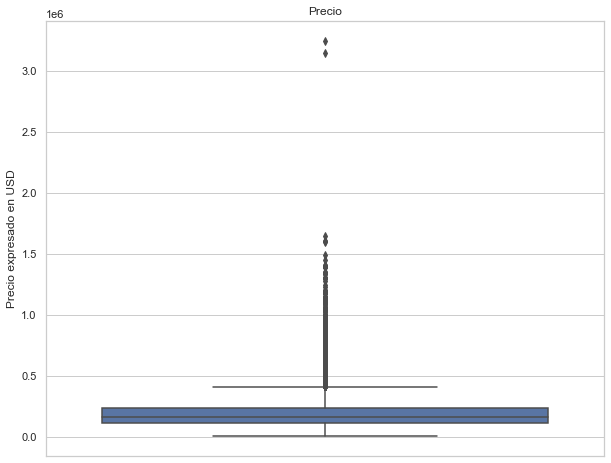

In [20]:
sns.set_theme(style="whitegrid")
g = sns.boxplot(y=data_p2["price"])
sns.set(rc={'figure.figsize':(10,8)})
g.set_title('Precio')
g.set_ylabel('Precio expresado en USD')

In [21]:
#Rango intercuartilico para trtar outliers


Q1 = data_p2.price.quantile(0.25)
Q3 = data_p2.price.quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)


data_p2= data_p2[data_p2.price > Lower_Fence]
data_p2 = data_p2[data_p2.price < Upper_Fence]

data_p2 = data_p2[data_p2.price < 600000]

Text(0, 0.5, 'Precio expresado en USD')

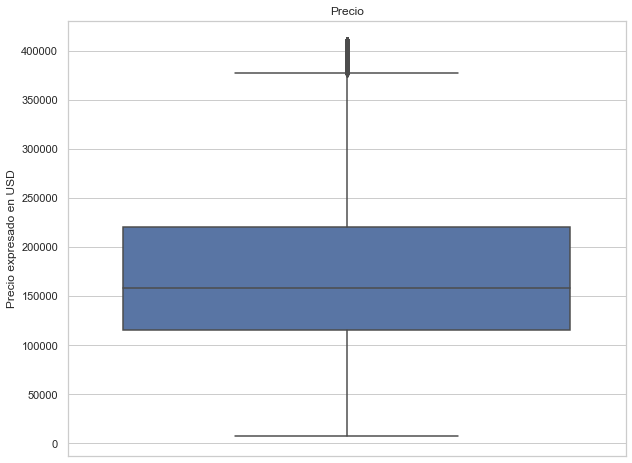

In [22]:
sns.set_theme(style="whitegrid")
g = sns.boxplot(y=data_p2["price"])
sns.set(rc={'figure.figsize':(10,8)})
g.set_title('Precio')
g.set_ylabel('Precio expresado en USD')

In [23]:
data_p2.shape

(65313, 9)

## Aplicamos label encoding

In [27]:
Labelencoder= LabelEncoder()
Labelencoder.fit(data_p2["property_type"])
data_p2["Tipo_propiedad"] = Labelencoder.transform(data_p2["property_type"])
data_p2.drop("property_type",axis=1,inplace=True)

KeyError: 'property_type'

En este caso aplicamos el label encoding a la variable 'property_type' que poseeia 3 tipos de propiedades
<br/>
Casa, PH, Departamento

In [28]:
data_p2.isnull().sum().sort_values(ascending=False)

lat                2903
lon                2903
rooms                 0
surface_covered       0
surface_total         0
bedrooms              0
bathrooms             0
price                 0
Tipo_propiedad        0
dtype: int64

In [26]:
data_p2 = data_p2.dropna()

#### No tenemos datos missing, por ende vamos a realizar paricionar los datos y procedemos a escalar los mismos

In [27]:
# VUELVO A CARGAR X E Y
X = data_p2.drop("price", axis=1)
y = data_p2.price

In [28]:
#particionamos el dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 422)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3, random_state = 123)


In [29]:
#escalamos los datos para que el modelo pueda entender mejor los datos 
from sklearn.preprocessing import StandardScaler


sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_X1 = StandardScaler()
X_train1 = sc_X.fit_transform(X_train1)
X_test1 = sc_X.transform(X_test1)


Los datos ya estan escalados, el modelo ahora aprendera con mas facilidad

## Desafio: Clustering

Vamos a aplicar Clustering para que los modelos de Machine Learning, agrupen los datos 

In [30]:
from sklearn.cluster import KMeans

In [31]:
lat_lon = data_p2[["lat","lon"]]
lat_lon.head()

lat    lon
1 -34.62 -58.41
2 -34.59 -58.43
3 -34.58 -58.44
5 -34.59 -58.44
6 -34.60 -58.43

Usaremos las variables lon y lat para el clustering
<br/>
**¿Por què?**
Porque si graficamos la relacion entre estas variables, podemos notar que se refleja en el grafico una silueta similar a Buenos Aires
<br/>
Entonces al aplicar un algorito de aprendizaje 'no supervisado' vamos a ver si logra captar la relacion entre las demas variables y ubicar los centroides en cada uno de los barrios
<br/>
Ademas sabemos que el precio de los inmuebles varia mucho de un barrio a otro, como quedo en evidencia en el proyecto pasado

<AxesSubplot:xlabel='lon', ylabel='lat'>

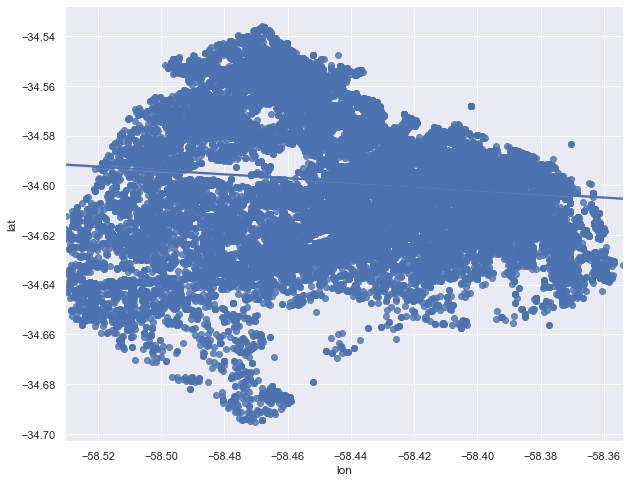

In [32]:
# library & dataset
import seaborn as sns

# use the function regplot to make a scatterplot
sns.regplot(x=lat_lon["lon"], y=lat_lon["lat"])

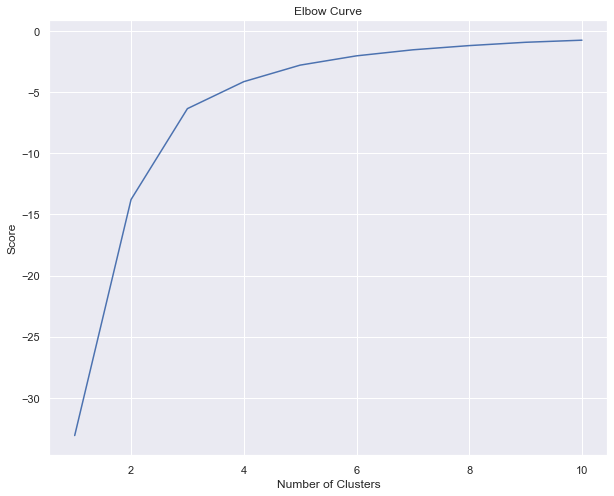

In [33]:
K_clusters = range(1,11)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
y_lat = lat_lon[['lat']]
X_lon = lat_lon[['lon']]
score = [kmeans[i].fit(y_lat).score(y_lat) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [34]:
kmeans = KMeans(n_clusters = 10, init ='k-means++')
kmeans.fit(data_p2[data_p2.columns[0:2]]) # Compute k-means clustering.
data_p2['cluster_label'] = kmeans.fit_predict(data_p2[data_p2.columns[0:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(data_p2[data_p2.columns[0:2]]) # Labels of each point
data_p2.head(10)

lat    lon  rooms  surface_covered  surface_total  bedrooms  bathrooms  \
1  -34.62 -58.41   2.00            58.00          70.00      1.00       2.00   
2  -34.59 -58.43   2.00            45.00          45.00      1.00       1.00   
3  -34.58 -58.44   2.00            50.00          85.00      1.00       1.00   
5  -34.59 -58.44   2.00            56.00          56.00      1.00       1.00   
6  -34.60 -58.43   2.00            70.00          70.00      1.00       1.00   
7  -34.60 -58.43   2.00            70.00          70.00      1.00       1.00   
8  -34.64 -58.42   1.00            37.00          45.00      1.00       1.00   
9  -34.64 -58.42   1.00            37.00          45.00      1.00       1.00   
10 -34.59 -58.50   2.00            49.00          66.00      1.00       2.00   
11 -34.60 -58.38   2.00            59.00          68.00      1.00       1.00   

       price  Tipo_propiedad  cluster_label  
1  159000.00               2              9  
2  125000.00               2              2  
3  295000.00               2              1  
5  150000.00               2              7  
6  159500.00               2              7  
7  159500.00               2              7  
8   89000.00               2              9  
9   89000.00               2              9  
10 170000.00               2              8  
11 149000.00               1              6

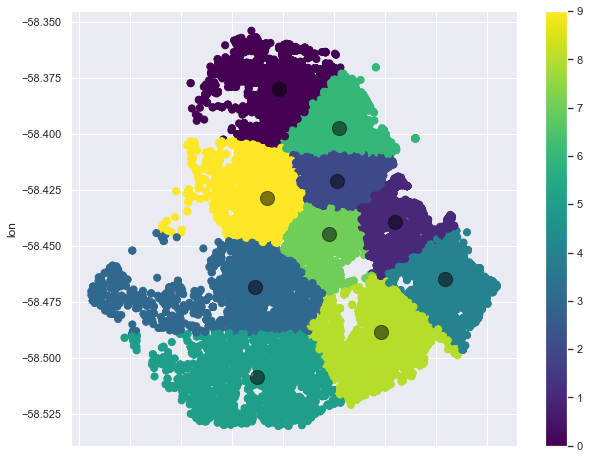

In [35]:
lat_lon.plot.scatter(x = 'lat', y = 'lon', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Logramos lo que nos propusimos, veremos como se refleja en los modelos

# Modelo de Machine Learning

In [36]:
#importamos paquetes
# Importamos los paquetes necesarios:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

In [37]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=12, min_samples_split=2, min_samples_leaf=2, random_state=3)
knn_regressor = KNeighborsRegressor(n_neighbors=3)

In [38]:
knn_regressor.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
linear_model.fit(X_train, y_train)

LinearRegression()

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 43468.13078497778
Raíz del error cuadrático medio en Test: 43401.91130544517
-----------------------
Error de R cuadrado en test:  0.6837004034603842
Error de R cuadrado en train:  0.6860073721545367


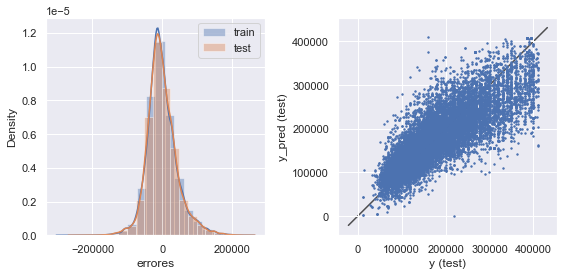

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 26136.319350703285
Raíz del error cuadrático medio en Test: 32320.919976097146
-----------------------
Error de R cuadrado en test:  0.8245924205120302
Error de R cuadrado en train:  0.8864815696619889


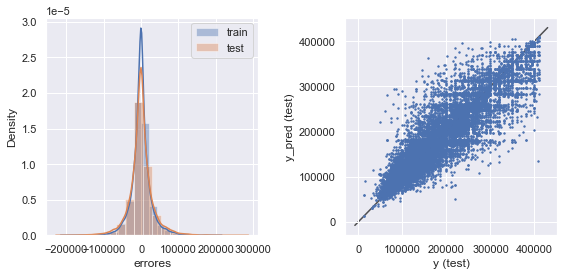

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 19833.040259110523
Raíz del error cuadrático medio en Test: 29338.22238466689
-----------------------
Error de R cuadrado en test:  0.8554731556805192
Error de R cuadrado en train:  0.9346333680545638


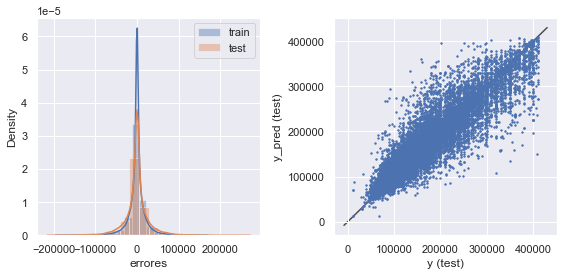

In [39]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']
for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print("-----------------------")
    r_square1 = metrics.r2_score(y_test, y_test_pred)
    print('Error de R cuadrado en test: ', r_square1)
    r_square1 = metrics.r2_score(y_train, y_train_pred)
    print('Error de R cuadrado en train: ', r_square1)
    plt.figure(figsize = (8,4))
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.tight_layout()
    plt.show()

# ¿Qué paso? los resultados a simple vista son asombrosos

Los valores de RSME de estos 3 modelos son mucho màs bajos con respecto a los del primer proyecto, teniendo en cuenta que el mejor modelo del proyecto_1 fue el arbol de decisión (con parametros optimizados) con un valor de RSME de 85250.733. Las metricas arrojadas por estos algoritmos fueron de la mitad de lo que tuvo buestro mejor arbol de decisión


<AxesSubplot:>

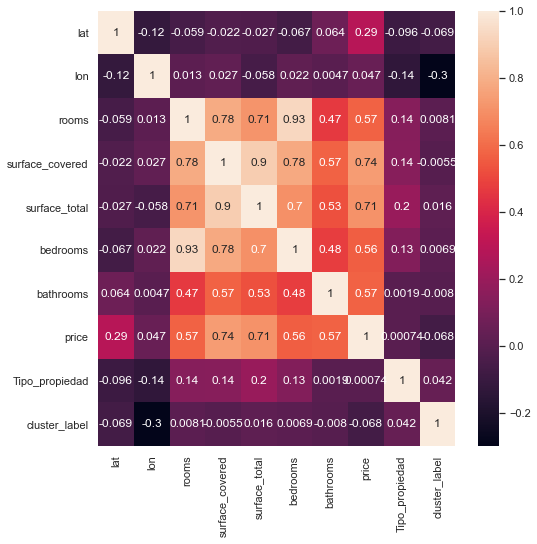

In [40]:
fig =plt.subplots(figsize=(8,8))
sns.heatmap(data_p2.corr(), annot=True)

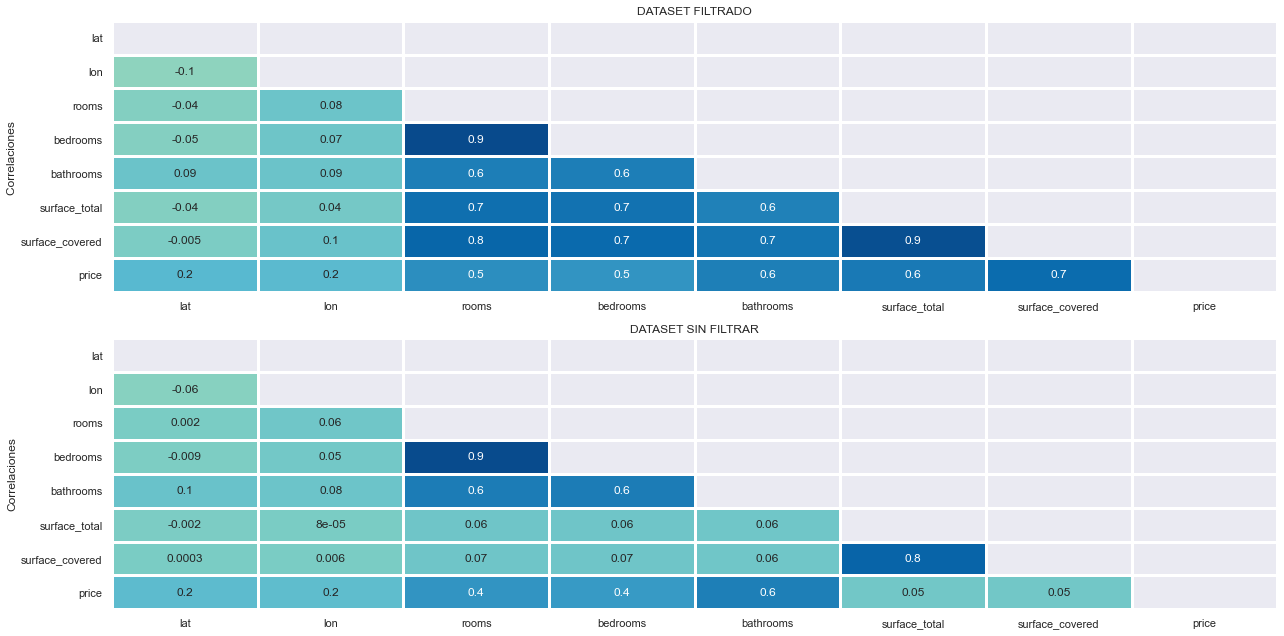

Aqui tenemos lo es la explicacion de porque nos dan resultados tan distintos. Recordemos que en una mano tenemos un dataset filtrado por el criterio del rango intercuartilico de la distribucion de cada variable y en la otra, realizamos un filtrado mas a 'ojimetro', porque? porque realizamos graficos, los analizamos y evaluamos entre que valores ibamos a filtralos a las variables del dataset. Por ende concluyo que nuestro primer filtrado estuvo sesgado por nosotro mientras que este ultimo se realizo mediante un criterio mas apropiado

----------------------------------------------------------
# Modelos avanzados
-----------------------------------------------------------
1) RANDOM FOREST
2) POLY LINEAR REG 
3) Bagging Regressor

#### RANDOM FOREST REGRESSOR 

In [41]:
#importamos el modelo
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [42]:
random_forest = RandomForestRegressor(bootstrap= True, max_features= "log2", n_estimators= 430)

In [43]:
random_forest.fit(X_train, np.ravel(y_train,order='C'))

RandomForestRegressor(max_features='log2', n_estimators=430)

In [44]:
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

Raíz del error cuadrático medio en Train: 9600.01687354002
Raíz del error cuadrático medio en Test: 23079.703152165534
Error de R cuadrado en test:  0.910558028165404
Error de R cuadrado en train, : 0.984684840853461


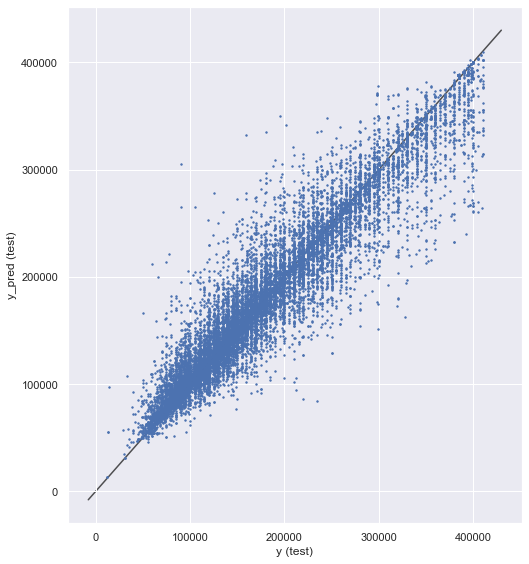

In [45]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
r_square = metrics.r2_score(y_test, y_test_pred)
print('Error de R cuadrado en test: ', r_square)
r_square = metrics.r2_score(y_train, y_train_pred)
print('Error de R cuadrado en train, :', r_square)
plt.figure(figsize = (14,8))


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

#### **Grid Search basado en validación cruzada**


In [46]:
params = { "max_depth"   : [None],
            "n_estimators" : [600],
            "max_features" : ["log2"],
            "bootstrap"    : [True, False]
        }
rf_cv = GridSearchCV(estimator=random_forest, param_grid=params,
                     scoring="neg_mean_absolute_percentage_error", cv=5).fit(X_train, y_train)

#### **Optimizacion de hyperparametros**

En este gridsearch redujimos algunos hiperparametros, porque experimentamos varias veces con ello
<br/>
1)Max depth la dejamos en none, aunque esto nos dificutara graficar los arboles de decision (lo trataremos mas adelante)
<br/>
2) n_stimators lo seteamos en 600, este define la cantidad de arboles del random forest, 600 es el optimo
<br/>
3) 'max_features' max_features=log2(n_features)
<br/>
4) 'bootstrap' se encarga de defiinir si, se toma todo el dataset para cada arbol 'false' o se toma una muestra 'true'

Como mencioanamos arriba se acotaron los hiperparametros del gridsearch debido a su alto costo computacional (surgen problemas de memoria), otra razon fue que mas adelante tambien haremos otra busqueda de hiperparamtros por grilla y requerira tambien su espacio

### Documentacion de Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor


In [47]:
print(f"El mejor MAPE es: {round(-1 * rf_cv.best_score_ * 100, 2)}%")

print("Los mejores hiperparametros son: ")
for key, value in rf_cv.best_params_.items():
    print(f"{key}: {value}")

El mejor MAPE es: 8.38%
Los mejores hiperparametros son: 
bootstrap: False
max_depth: None
max_features: log2
n_estimators: 600


In [48]:
idx_rf = rf_cv.best_index_
results_rf = (pd.DataFrame(rf_cv.cv_results_)).iloc[idx_rf]


In [49]:
results_rf

mean_fit_time                                                     37.07
std_fit_time                                                       0.12
mean_score_time                                                    1.58
std_score_time                                                     0.05
param_bootstrap                                                   False
param_max_depth                                                    None
param_max_features                                                 log2
param_n_estimators                                                  600
params                {'bootstrap': False, 'max_depth': None, 'max_f...
split0_test_score                                                 -0.08
split1_test_score                                                 -0.08
split2_test_score                                                 -0.08
split3_test_score                                                 -0.09
split4_test_score                                               

### **Evaluacion del modelo**

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [51]:
rf = rf_cv.best_estimator_

print(f"El MAE en entrenamiento es: {round(mean_absolute_error(y_train, rf.predict(X_train)), 3)}")
print(f"El MAPE en entrenamiento es: {round(mean_absolute_percentage_error(y_train, rf.predict(X_train)), 4) * 100}")
print(f"El RMSE en entrenamiento es: {round(mean_squared_error(y_train, rf.predict(X_train), squared=False), 2)}")
print(f"El R2 en entrenamiento es: {round(rf.score(X_train, y_train), 3)}")

El MAE en entrenamiento es: 1709.5
El MAPE en entrenamiento es: 1.06
El RMSE en entrenamiento es: 4701.31
El R2 en entrenamiento es: 0.996


In [52]:
print(f"El MAE en prueba es: {round(mean_absolute_error(y_test, rf.predict(X_test)), 3)}")
print(f"El MAPE en prueba es: {round(mean_absolute_percentage_error(y_test, rf.predict(X_test)), 3) * 100}")
print(f"El RMSE en prueba es: {round(mean_squared_error(y_test, rf.predict(X_test), squared=False), 2)}")
print(f"El R2 en prueba es: {round(rf.score(X_test, y_test), 3)}")

El MAE en prueba es: 12156.691
El MAPE en prueba es: 7.7
El RMSE en prueba es: 22578.37
El R2 en prueba es: 0.914


Las metricas elegidas para la evaluacion del modelo son las siguiente:
    <br/>
    1) MAE es el promedio del error absoluto, a medida que crece el modelo se confunde en las prediciones
    <br/>
    2) R2 o coeficiente de determinacion es una metrica donde el mejor puntaje es 1.0

### **Visualizamos nuestros resultados**

Raíz del error cuadrático medio en Train: 4701.31
Raíz del error cuadrático medio en Test: 22578.37
Error de R cuadrado en test, asociado con la regresión lineal, usada para benchmark:  0.996
Error de R cuadrado en train, asociado con la regresión lineal, usada para benchmark: 0.914


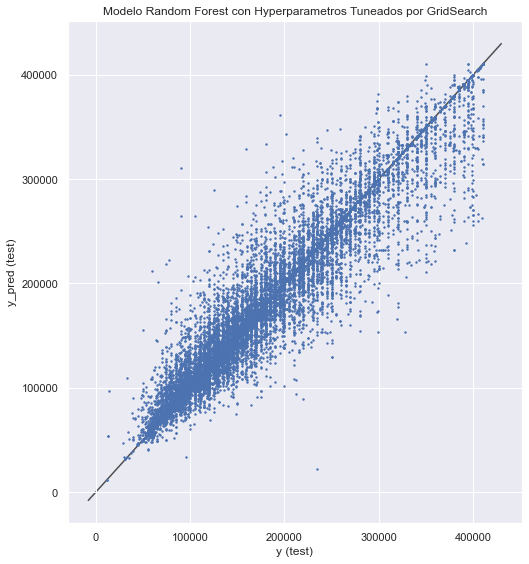

In [53]:
rmse_train = round(mean_squared_error(y_train, rf.predict(X_train), squared=False), 2)
rmse_test = round(mean_squared_error(y_test, rf.predict(X_test), squared=False), 2)
y_train_pred =rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
r_square = round(rf.score(X_train, y_train), 3)
print('Error de R cuadrado en test, asociado con la regresión lineal, usada para benchmark: ', r_square)
r_square = round(rf.score(X_test, y_test), 3)
print('Error de R cuadrado en train, asociado con la regresión lineal, usada para benchmark:', r_square)
plt.figure(figsize = (14,8))

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.title("Modelo Random Forest con Hyperparametros Tuneados por GridSearch")
plt.tight_layout()
plt.show()

#### **Bagging Regressor**

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [55]:
bg = BaggingRegressor(random_state=42)

In [56]:
params_bg = {"n_estimators": [50,100,200],
              "max_features":[1,2,4,6,8],
              "max_samples": [0.5,0.1],
            "bootstrap": [True, False],
         "bootstrap_features": [True, False]}

#### **Optimizacion de hyperparametros**

'n_estimators' se encarga del numero de estimadores
<br/>
'max_features' se encargad del nuemero de features
<br/>
max_samples' se encarga de definir el numero de muestras de X
<br/>
'bootstrap' define si es True, las muestras se extraen con reemplazo y caso contrario si es False
<br/>
'bootstrap_features'

#### Documentacion de Bagging Regressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor

In [57]:
bg = GridSearchCV(bg,param_grid=params_bg, cv=5,n_jobs=-1)
bg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BaggingRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [1, 2, 4, 6, 8],
                         'max_samples': [0.5, 0.1],
                         'n_estimators': [50, 100, 200]})

In [58]:
print("Mejores parametros: "+str(bg.best_params_))
print("Mejor Score: "+str(bg.best_score_)+'\n')

scores = pd.DataFrame(bg.cv_results_)
scores.sort_values(by="rank_test_score")

Mejores parametros: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 8, 'max_samples': 0.5, 'n_estimators': 200}
Mejor Score: 0.893077970356831



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
116          32.23          0.16             0.90            0.06   
115          15.93          0.05             0.44            0.03   
114           8.03          0.05             0.22            0.01   
56           26.04          0.11             0.81            0.01   
110          24.36          0.33             0.84            0.05   
..             ...           ...              ...             ...   
35            1.49          0.01             0.22            0.00   
95            1.75          0.02             0.22            0.00   
5             1.47          0.02             0.22            0.01   
93            0.45          0.00             0.06            0.00   
33            0.39          0.02             0.06            0.00   

    param_bootstrap param_bootstrap_features param_max_features  \
116           False                    False                  8   
115           False                    False                  8   
114           False                    False                  8   
56             True                    False                  8   
110           False                    False                  6   
..              ...                      ...                ...   
35             True                    False                  1   
95            False                    False                  1   
5              True                     True                  1   
93            False                    False                  1   
33             True                    False                  1   

    param_max_samples param_n_estimators  \
116              0.50                200   
115              0.50                100   
114              0.50                 50   
56               0.50                200   
110              0.50                200   
..                ...                ...   
35               0.10                200   
95               0.10                200   
5                0.10                200   
93               0.10                 50   
33               0.10                 50   

                                                params  split0_test_score  \
116  {'bootstrap': False, 'bootstrap_features': Fal...               0.89   
115  {'bootstrap': False, 'bootstrap_features': Fal...               0.89   
114  {'bootstrap': False, 'bootstrap_features': Fal...               0.89   
56   {'bootstrap': True, 'bootstrap_features': Fals...               0.89   
110  {'bootstrap': False, 'bootstrap_features': Fal...               0.89   
..                                                 ...                ...   
35   {'bootstrap': True, 'bootstrap_features': Fals...               0.50   
95   {'bootstrap': False, 'bootstrap_features': Fal...               0.50   
5    {'bootstrap': True, 'bootstrap_features': True...               0.50   
93   {'bootstrap': False, 'bootstrap_features': Fal...               0.49   
33   {'bootstrap': True, 'bootstrap_features': Fals...               0.49   

     split1_test_score  split2_test_score  split3_test_score  \
116               0.90               0.90               0.89   
115               0.90               0.90               0.89   
114               0.89               0.90               0.89   
56                0.89               0.90               0.88   
110               0.89               0.89               0.89   
..                 ...                ...                ...   
35                0.50               0.51               0.50   
95                0.50               0.51               0.50   
5                 0.50               0.50               0.50   
93                0.50               0.51               0.50   
33                0.50               0.50               0.50   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
116               0.89             0.89            0.00                1 

### **Evaluacion del modelo**

In [59]:
print(f"El MAE en entrenamiento es: {round(mean_absolute_error(y_train, bg.predict(X_train)), 3)}")
print(f"El MAPE en entrenamiento es: {round(mean_absolute_percentage_error(y_train, bg.predict(X_train)), 4) * 100}")
print(f"El RMSE en entrenamiento es: {round(mean_squared_error(y_train, bg.predict(X_train), squared=False), 2)}")
print(f"El R2 en entrenamiento es: {round(bg.score(X_train, y_train), 3)}")

El MAE en entrenamiento es: 7778.398
El MAPE en entrenamiento es: 4.91
El RMSE en entrenamiento es: 12729.89
El R2 en entrenamiento es: 0.973


In [60]:
print(f"El MAE en prueba es: {round(mean_absolute_error(y_test, bg.predict(X_test)), 3)}")
print(f"El MAPE en prueba es: {round(mean_absolute_percentage_error(y_test, bg.predict(X_test)), 3) * 100}")
print(f"El RMSE en prueba es: {round(mean_squared_error(y_test, bg.predict(X_test), squared=False), 2)}")
print(f"El R2 en prueba es: {round(bg.score(X_test, y_test), 3)}")

El MAE en prueba es: 14283.268
El MAPE en prueba es: 9.0
El RMSE en prueba es: 23993.98
El R2 en prueba es: 0.903


## **Visualizamos nuestros resultados**

Raíz del error cuadrático medio en Train: 12729.89
Raíz del error cuadrático medio en Test: 23993.98
Error de R cuadrado en test para el modelo Bagging Regressor:  0.973
Error de R cuadrado en train para el modelo Bagging Regressor: 0.903


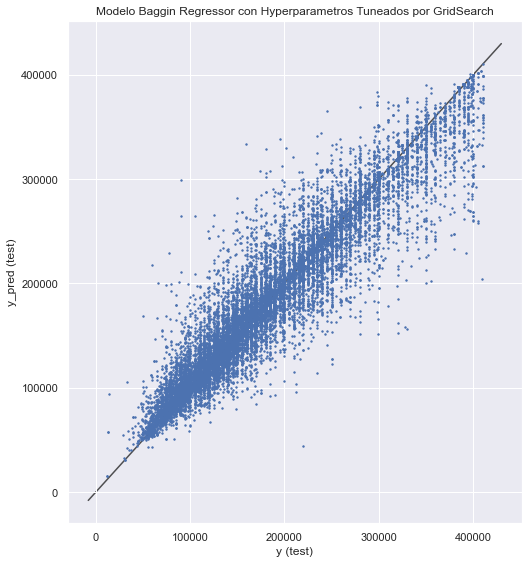

In [61]:
rmse_train = round(mean_squared_error(y_train, bg.predict(X_train), squared=False), 2)
rmse_test = round(mean_squared_error(y_test, bg.predict(X_test), squared=False), 2)
y_train_pred =bg.predict(X_train)
y_test_pred = bg.predict(X_test)
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
r_square = round(bg.score(X_train, y_train), 3)
print('Error de R cuadrado en test para el modelo Bagging Regressor: ', r_square)
r_square = round(bg.score(X_test, y_test), 3)
print('Error de R cuadrado en train para el modelo Bagging Regressor:', r_square)
plt.figure(figsize = (14,8))

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
plt.title("Modelo Baggin Regressor con Hyperparametros Tuneados por GridSearch")
plt.tight_layout()
plt.show()

#### **Poly Features regression, Ridge and Lasso regulatization**

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn import metrics
import math

features = PolynomialFeatures(degree=7)

x_train_transformed = features.fit_transform(X_train)
model = LinearRegression()
model.fit(x_train_transformed, y_train)

In [90]:
x_test_transformed = features.fit_transform(X_test)

train_pred = model.predict(x_train_transformed)
rmse_poly_4_train = mean_squared_error(y_train, train_pred, squared = False)
print("Train RMSE for Polynonial Regression of degree 4 is {}.".format(rmse_poly_4_train))

test_pred = model.predict(x_test_transformed)
rmse_poly_4 = mean_squared_error(y_test, test_pred, squared = False)
print("Test RMSE for Polynonial Regression of degree 4 is {}.".format(rmse_poly_4))

Train RMSE for Polynonial Regression of degree 4 is 44937.77124276765.
Test RMSE for Polynonial Regression of degree 4 is 32537924424297.098.


#### **Aplicamos la regulariazcion**

In [46]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(x_train_transformed, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

NameError: name 'x_train_transformed' is not defined

In [98]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

_ = modelo.fit(X = x_train_transformed, y = y_train)

KeyboardInterrupt: 

In [101]:
# Predicciones train
# ==============================================================================
predicciones_train = grid.predict(x_train_transformed)
predicciones_train = predicciones_train.flatten()
predicciones_train[:10]

array([245322.87131113, 104670.71809925, 214177.55586563, 300703.89850273,
       147431.80010845, 186160.48727583, 190253.77401461, 185126.78300695,
       207207.02805154, 108893.69803426])

In [102]:
# Predicciones test
# ==============================================================================
predicciones_test = grid.predict(X=x_test_transformed)
predicciones_test = predicciones_test.flatten()
predicciones_test[:10]

array([114376.68482975, 287929.91394049, 252867.51661204, 326505.80556527,
       221700.176936  ,  97459.02171954, 233174.03666717, 147908.45271452,
       106207.65299486, 107879.50787813])

In [103]:
# Error de test del modelo 
# ==============================================================================
rmse_ridge_test = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones_test,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge_test}")


El error (rmse) de test es: 171430.4788900074


In [104]:
# Error de test del modelo 
# ==============================================================================
rmse_ridge_train = mean_squared_error(
                y_true  = y_train,
                y_pred  = predicciones_train,
                squared = False
             )
print("")
print(f"El error (rmse) de train es: {rmse_ridge_train}")


El error (rmse) de train es: 44931.83708714307


Raíz del error cuadrático medio en Train: 44931.83708714307
Raíz del error cuadrático medio en Test: 171430.4788900074
----------------------------------------------
Error de R cuadrado en test, asociado con la regresión lineal, usada para benchmark:  0.665
Error de R cuadrado en train, asociado con la regresión lineal, usada para benchmark: -3.827


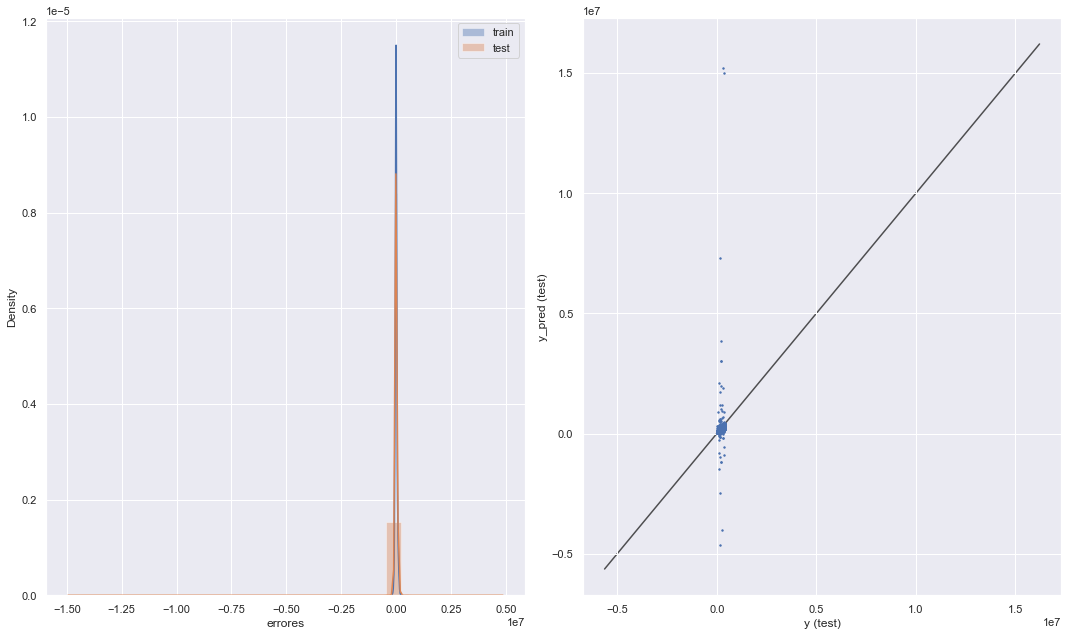

In [108]:
    y_train_pred = grid.predict(x_train_transformed)
    y_test_pred = grid.predict(x_test_transformed)
    print(f'Raíz del error cuadrático medio en Train: {rmse_ridge_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_ridge_test}')
    print("----------------------------------------------")
    r_square = round(grid.score(x_train_transformed, y_train), 3)
    print('Error de R cuadrado en test, asociado con la regresión lineal, usada para benchmark: ', r_square)
    r_square = round(grid.score(x_test_transformed, y_test), 3)
    print('Error de R cuadrado en train, asociado con la regresión lineal, usada para benchmark:', r_square)
    plt.figure(figsize = (15,9))
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    ax = plt.subplot(1,2,2)
    
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.tight_layout()
    plt.show()
    

## **EVALUACION DE LOS MODELOS**

#### Ordenamos los modelos por su desempeño, el mejor modelo fue el Random Forest, seguido del arbol de decision re entrenado y por ultimo La regularizacion Ridge

### **Bagging Regressor EL MEJOR A MODELO PARA MI**
Raíz del error cuadrático medio en Train: 12729.89
<br/>
Raíz del error cuadrático medio en Test: 23993.98
<br/>
Error de R cuadrado en test para el modelo Bagging Regressor:  0.973
<br/>
Error de R cuadrado en train para el modelo Bagging Regressor: 0.903
<br/>
----------------------------------------------

### **Random Forest**
Raíz del error cuadrático medio en Train: 4701.32
<br/>
Raíz del error cuadrático medio en Test: 22594.59
<br/>
Error de R cuadrado en test para el modelo Bagging Regressor:  0.996
<br/>
Error de R cuadrado en train para el modelo Bagging Regressor: 0.914
<br/>
----------------------------------------------

### **Arbol de Decision**

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 26136.319350703285
<br/>
Raíz del error cuadrático medio en Test: 32320.919976097146
<br/>
Error de R cuadrado en test:  0.8245924205120302
<br/>
Error de R cuadrado en train:  0.8864815696619889
<br/>
----------------------------------------------

### **Regularizacion Ridge con atributos polinomicos**

Raíz del error cuadrático medio en Train: 46120.46524086302
<br/>
Raíz del error cuadrático medio en Test: 46537.38592347357
<br/>

Error de R cuadrado en test, asociado con la regresión lineal, usada para benchmark:  0.647
<br/>
Error de R cuadrado en train, asociado con la regresión lineal, usada para benchmark: 0.644
<br/>
----------------------------------------------

## Eleccion de modelo
En base a los resultados, los modelos tuvieron un buen desempeño. Me quedo con el Bagging Regressor porque no tuvo tanta varianza en los errores de train y test a diferencia del Random Forest
<br/>
Este modelo es el mejor porque es menos complejo que los modelos anteriores y tiene mejores resultados en RMSE Y R2 SCORE. Quiero destacar que, el modelo de regresion polinomica con regularizacion era muy complejo y no tuvimos mejores resultado ni en comparacion con el arbol de decision del primer proyecto. No logro capturar la esencia de los datos

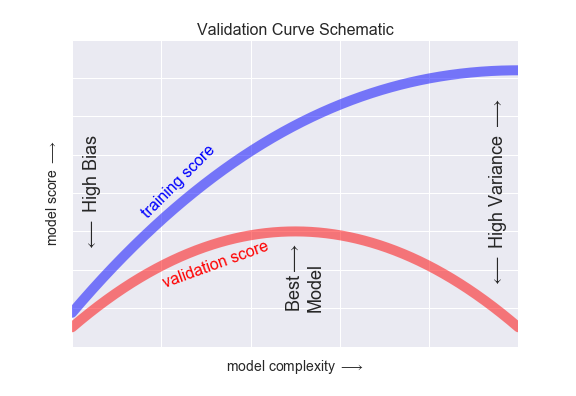

## *INTERPRETACION DE MODELOS*

### ***Feature importance***

Feature: 0, Score: 0.18235
Feature: 1, Score: 0.10153
Feature: 2, Score: 0.04276
Feature: 3, Score: 0.24289
Feature: 4, Score: 0.30512
Feature: 5, Score: 0.02408
Feature: 6, Score: 0.08861
Feature: 7, Score: 0.01266


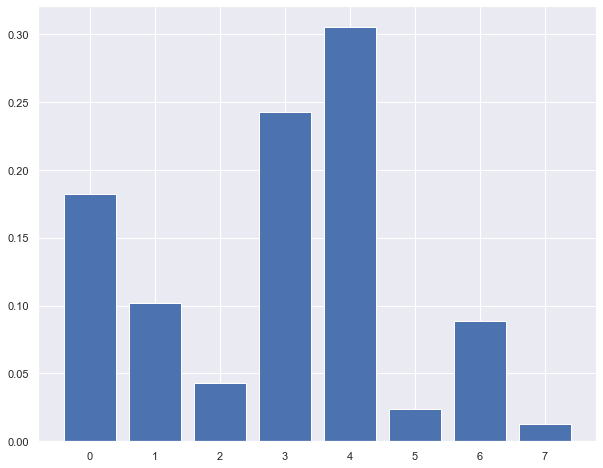

In [62]:
# get importance
importance_rf = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_rf):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance_rf))], importance_rf)
plt.show()

In [82]:
randomforestplot = RandomForestRegressor(random_state=42,bootstrap=False, criterion= "mse", max_depth= 3, max_features= "sqrt", n_estimators= 500)
randomforestplot.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=3, max_features='sqrt',
                      n_estimators=500, random_state=42)

"rooms", "surface_covered", "surface_total",  "bedrooms", "bathrooms", ti`p
from sklearn import tree

In [83]:
from sklearn import tree as Arbol


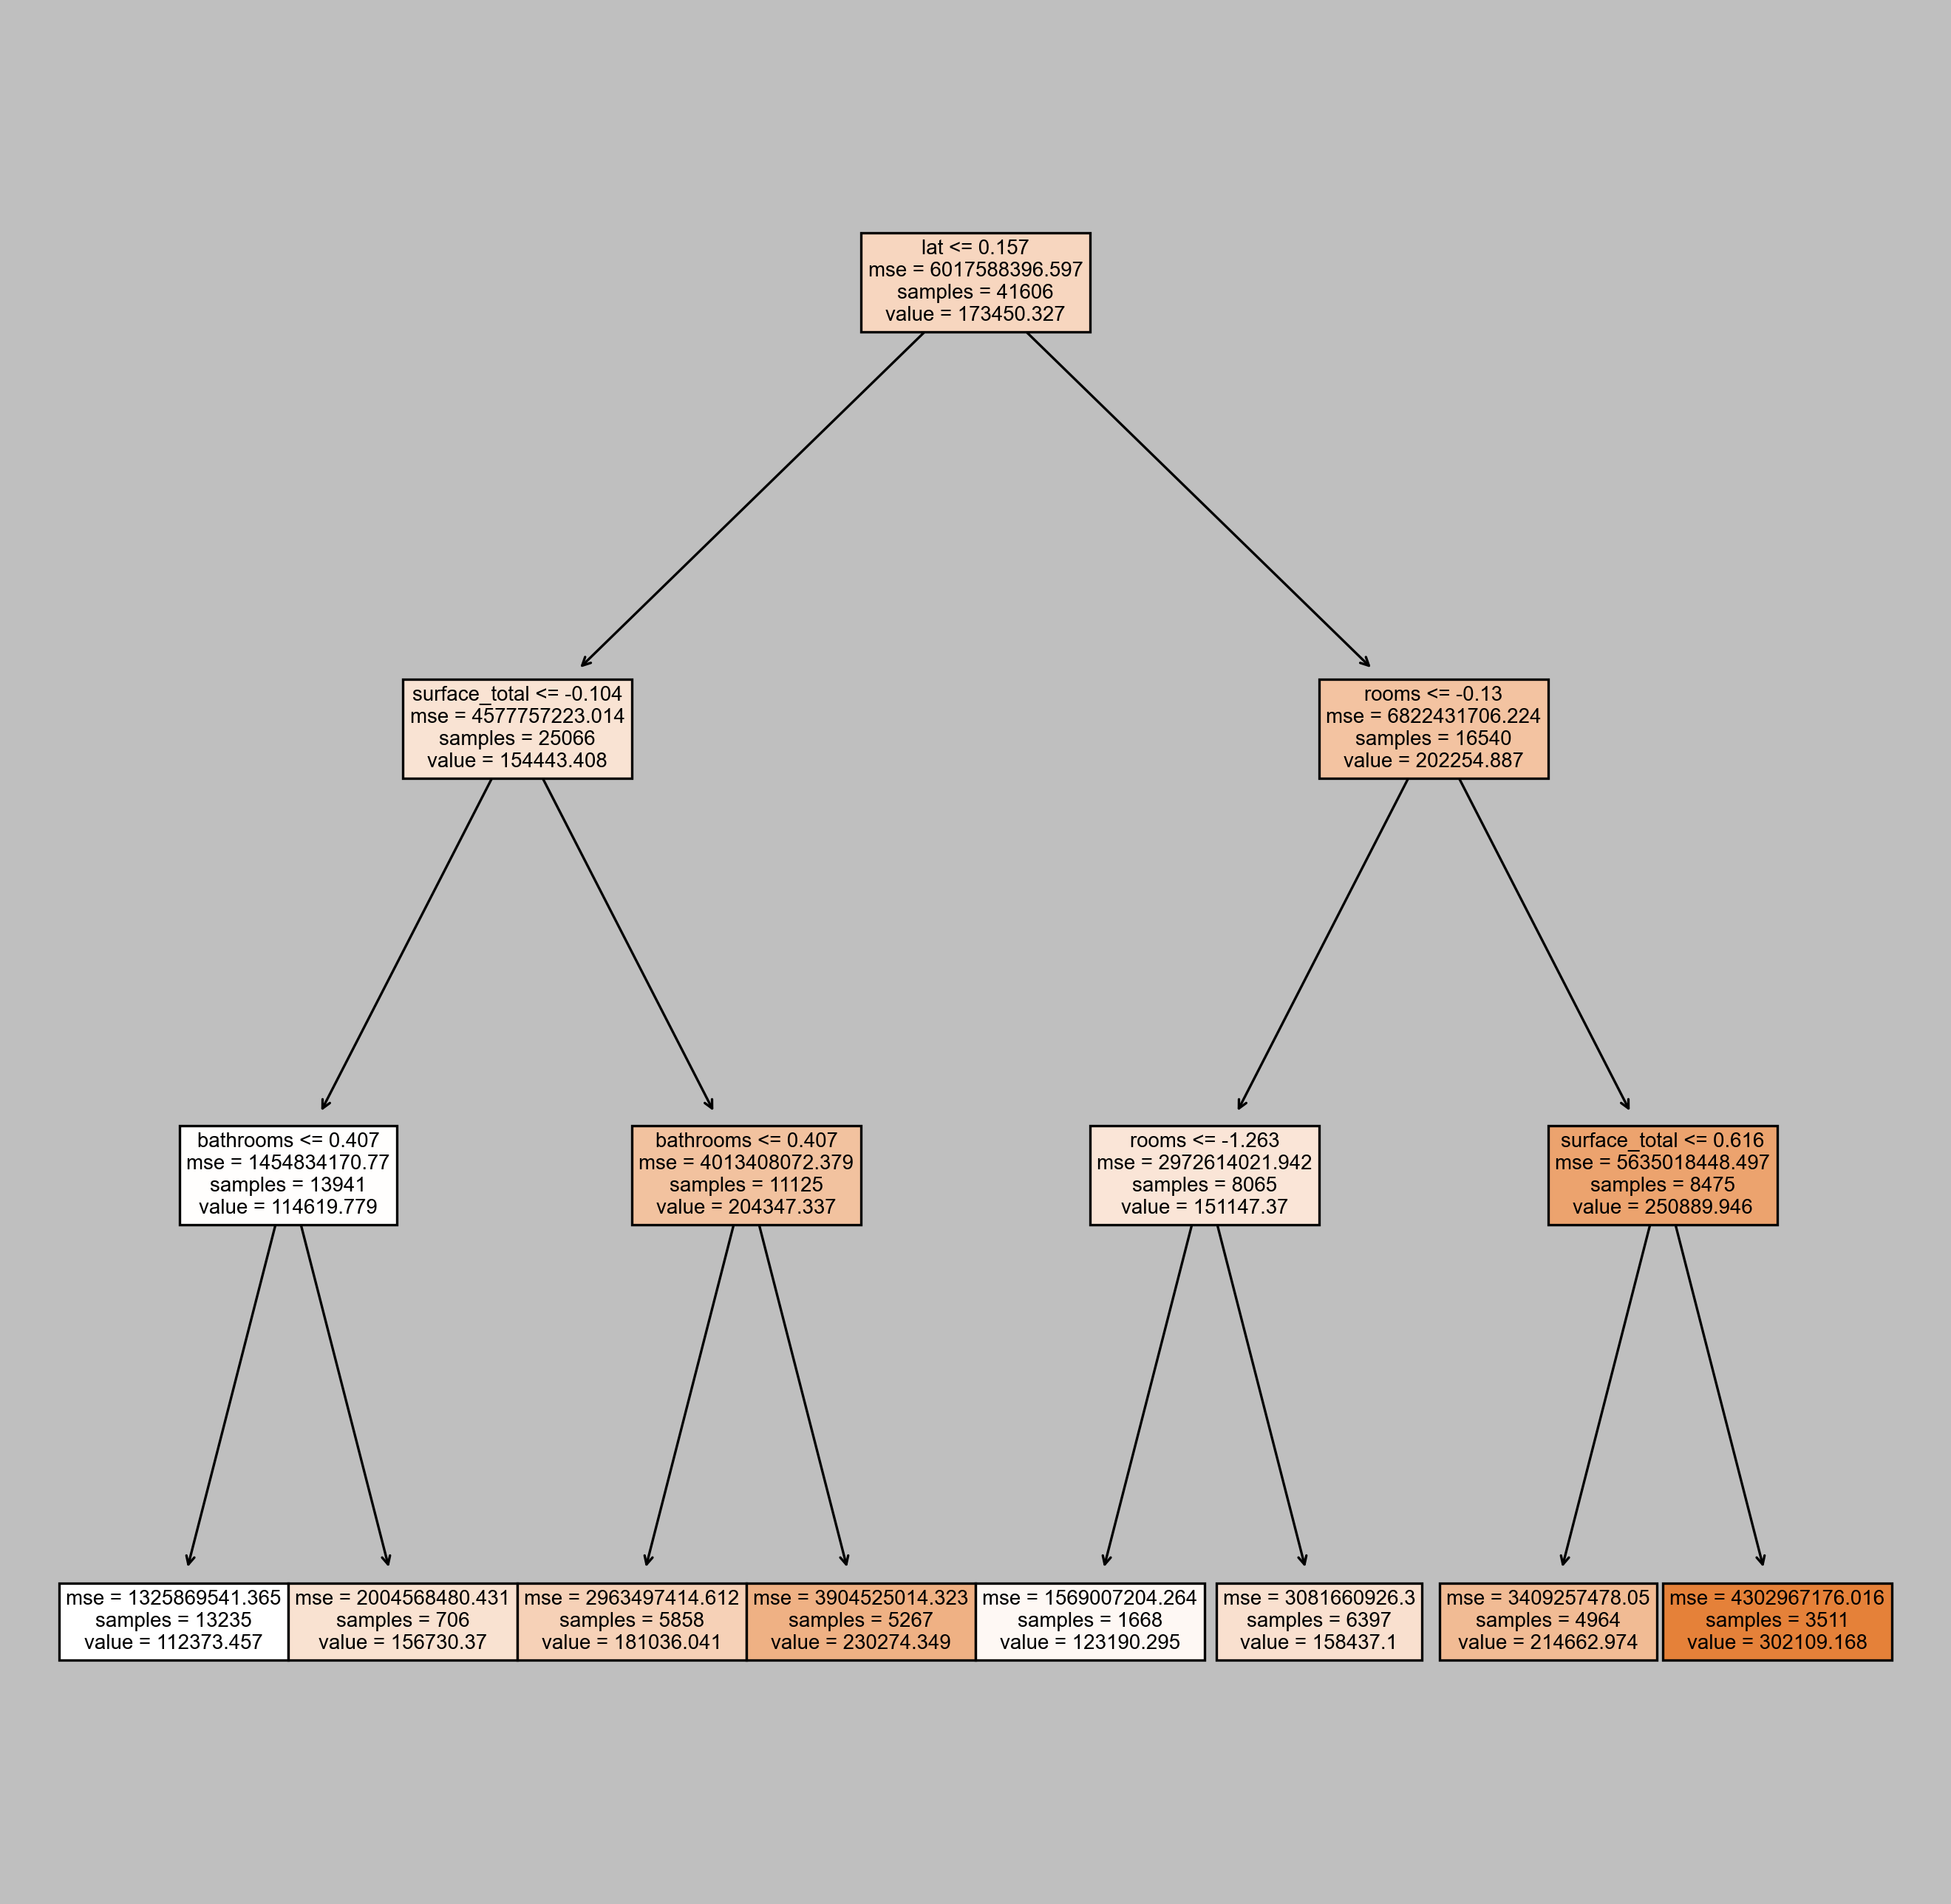

In [84]:
arbol_458 = randomforestplot.estimators_[458]


with plt.style.context('grayscale'):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
    Arbol.plot_tree(arbol_458,
                   feature_names = X.columns, 
                   filled = True);
    fig.savefig('rf_individualtree.png')

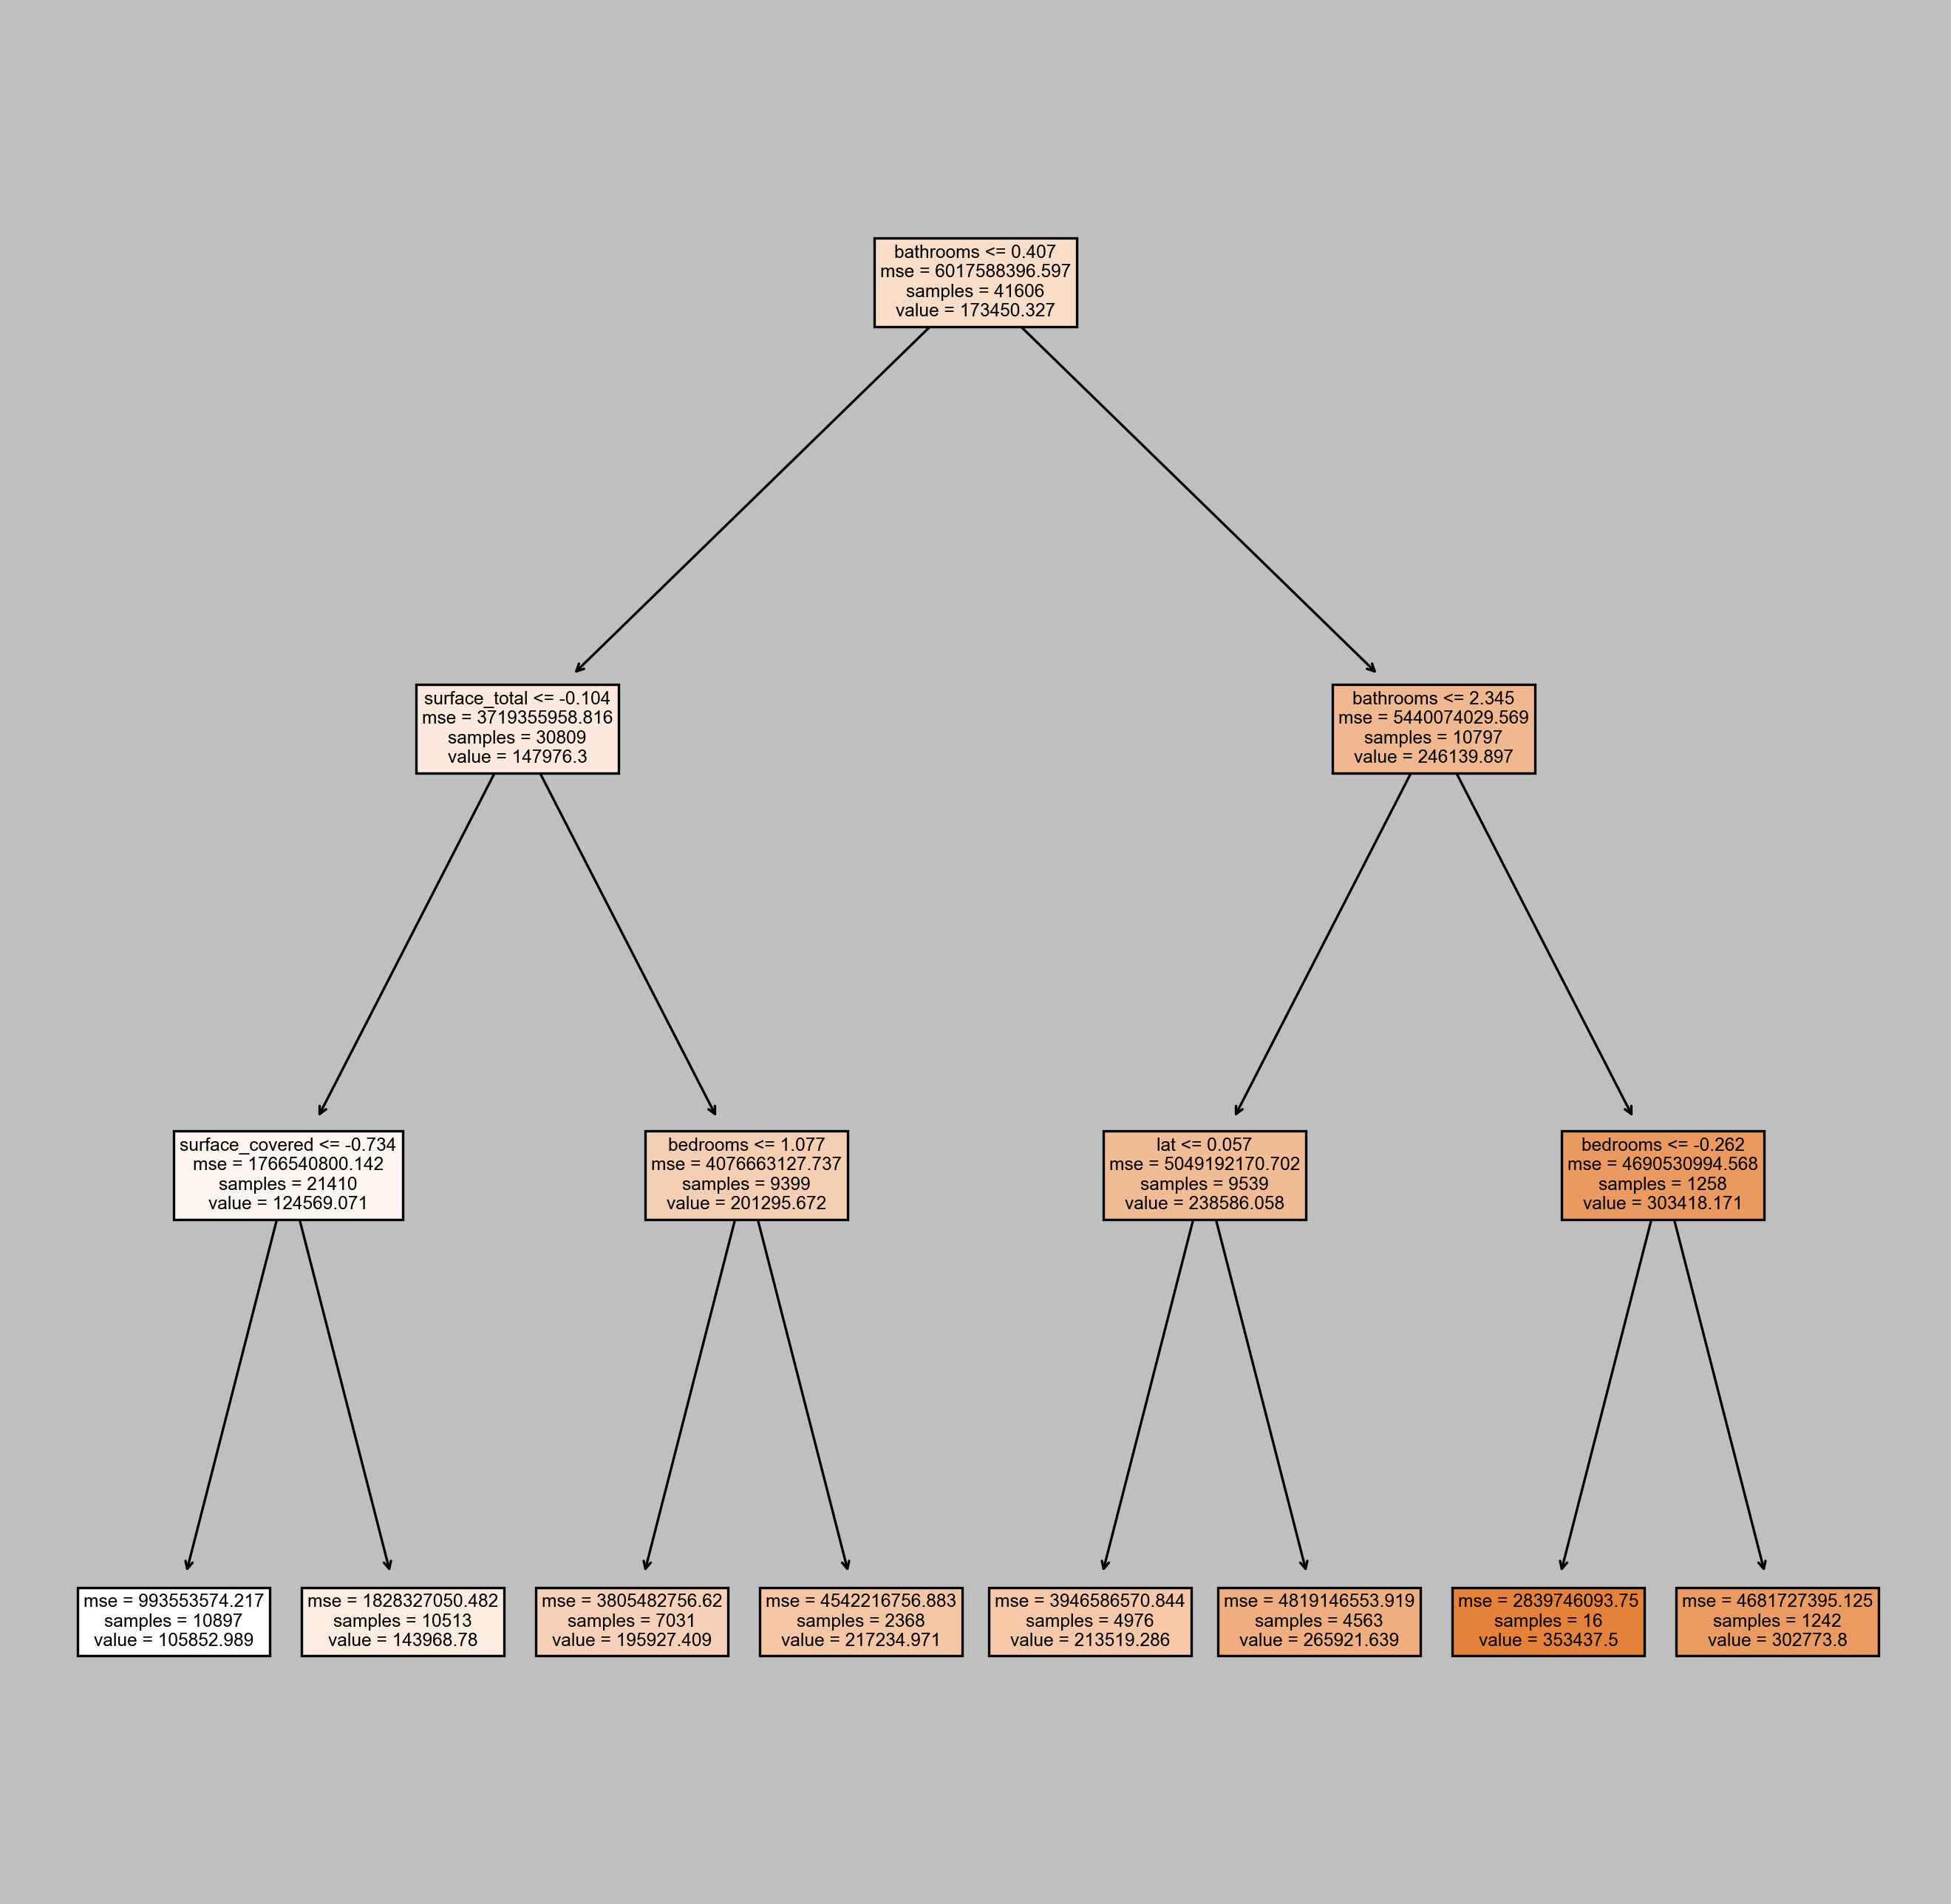

In [85]:
arbol_0 = randomforestplot.estimators_[0]


with plt.style.context('grayscale'):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
    Arbol.plot_tree(arbol_0,
                   feature_names = X.columns, 
                   filled = True);
    fig.savefig('rf_individualtree.png')

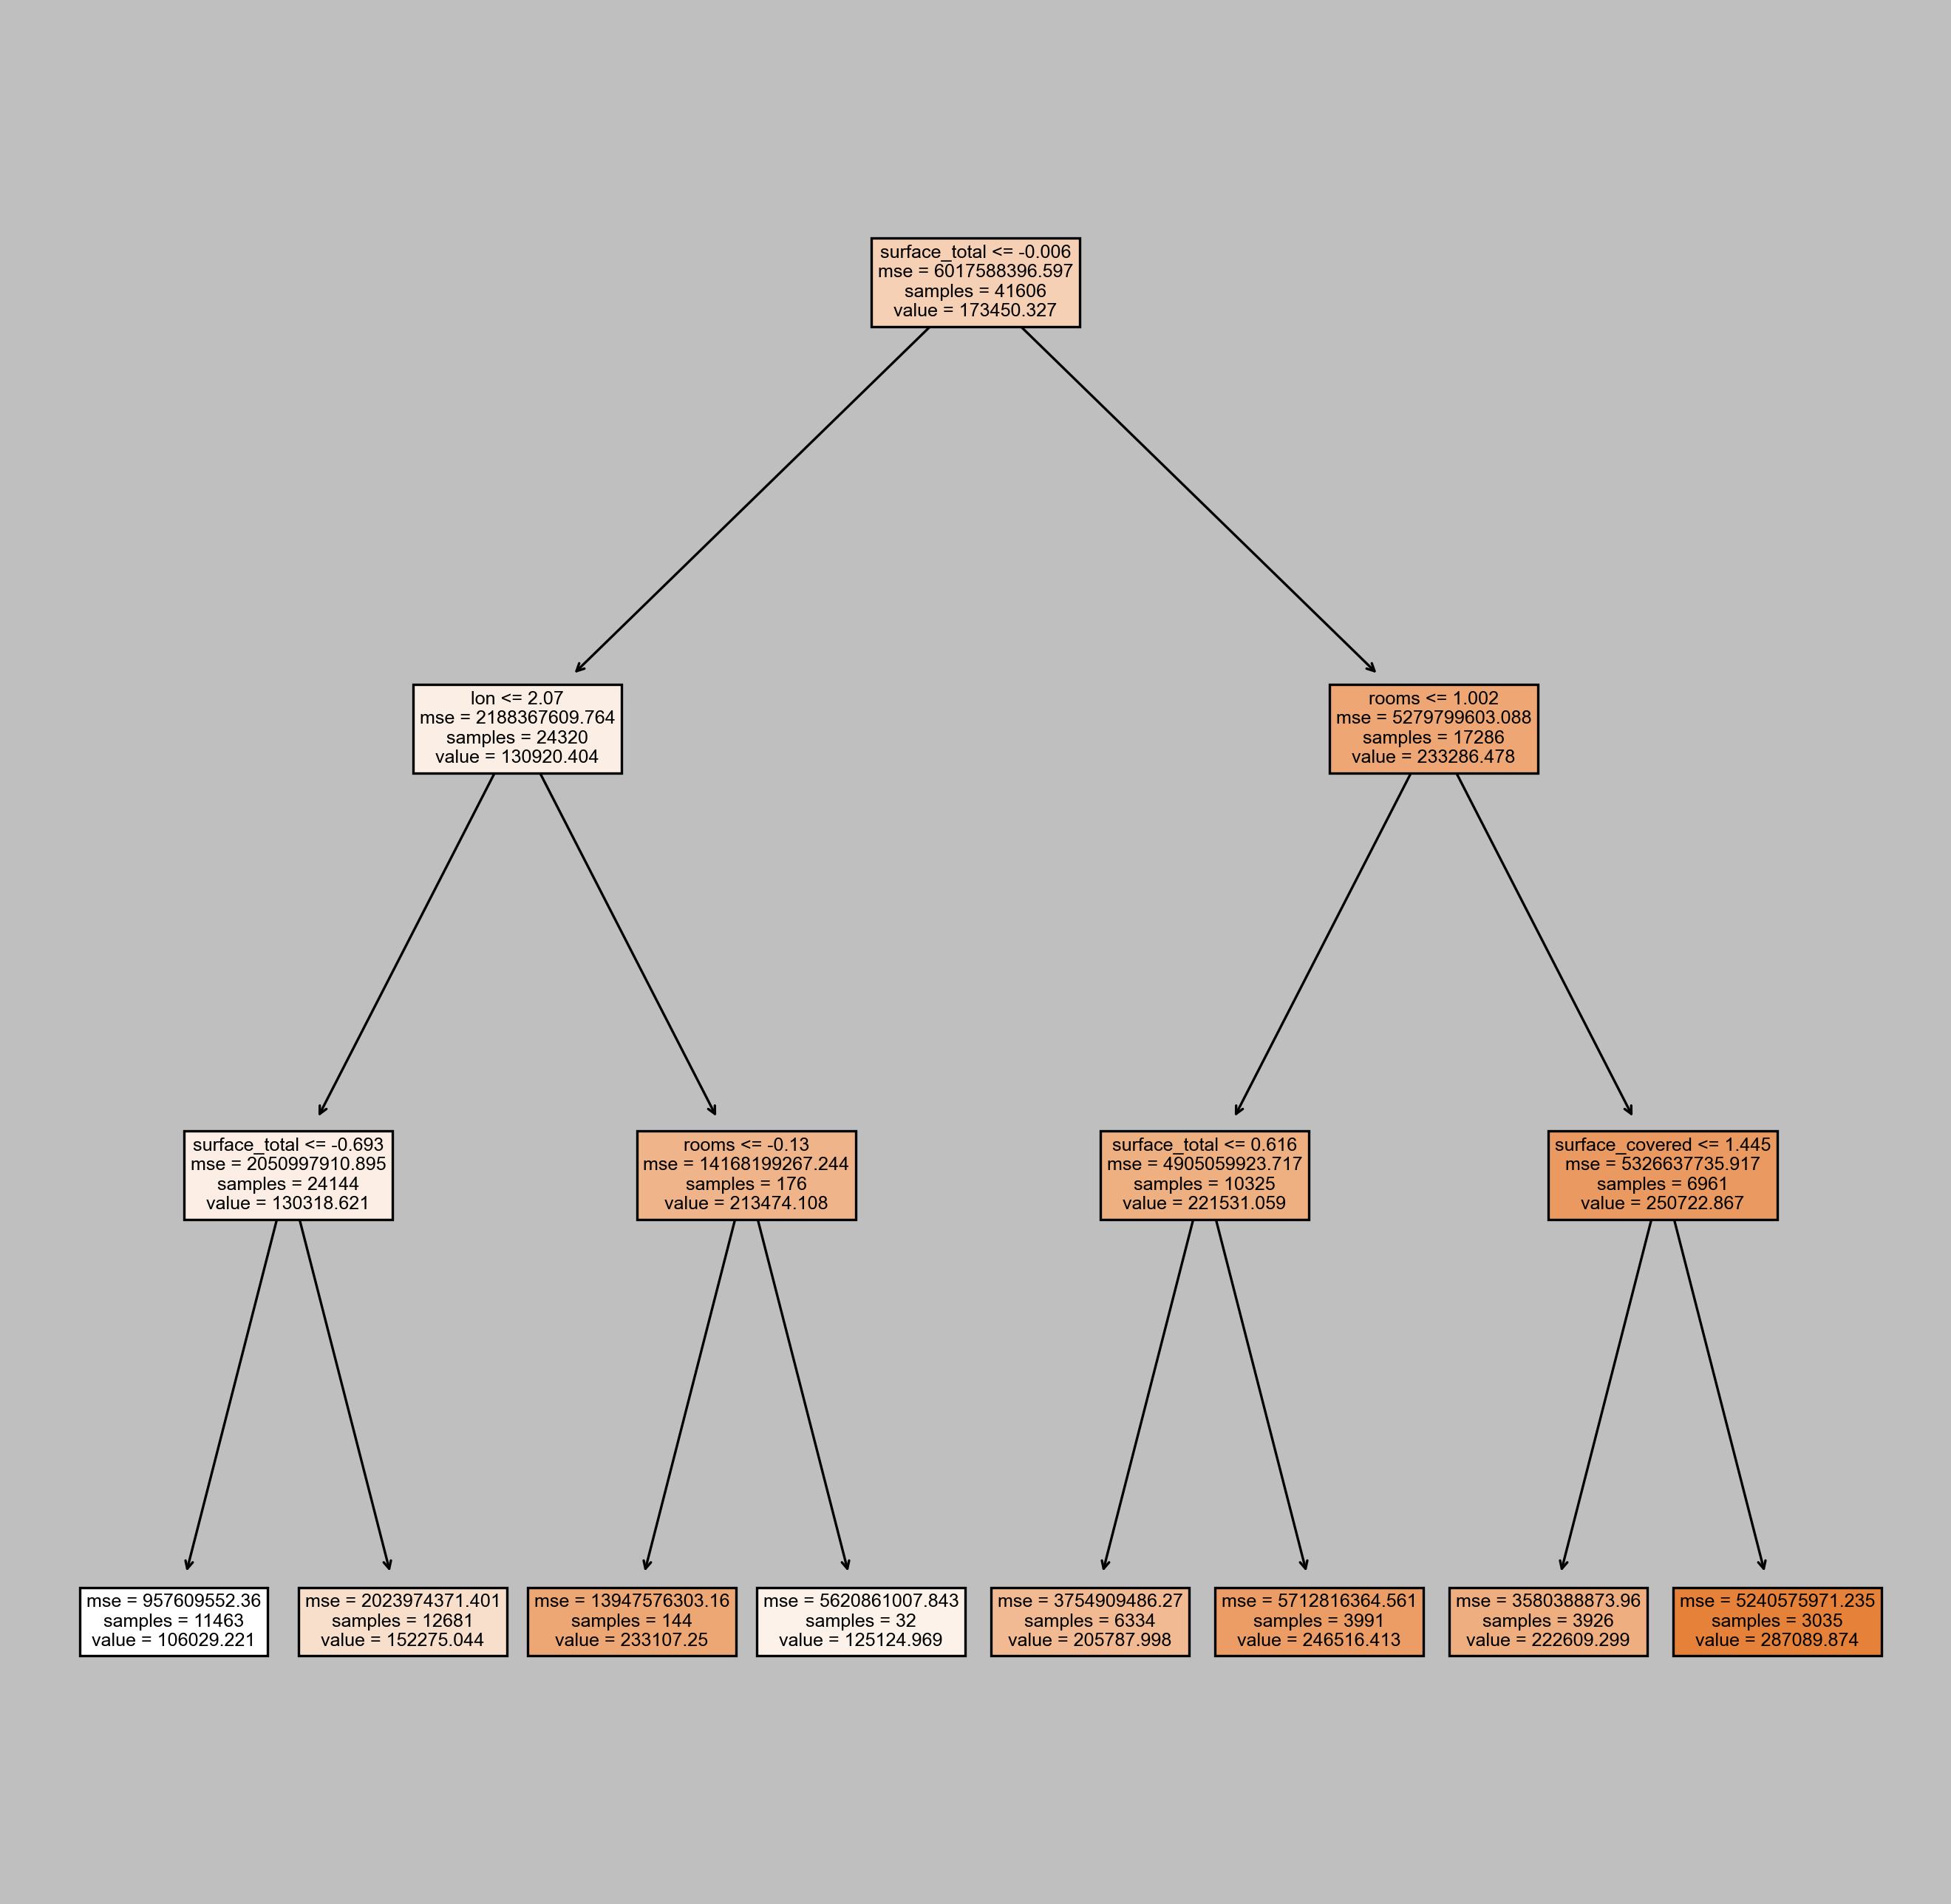

In [86]:
arbol_100 = randomforestplot.estimators_[100]


with plt.style.context('grayscale'):
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
    Arbol.plot_tree(arbol_100,
                   feature_names = X.columns, 
                   filled = True);
    fig.savefig('rf_individualtree.png')

¿Qué variables fueron relevantes para el modelo para hacer una predicción? Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

Analizando los arboles de decision (13, 0, 458)
<br/>
El modelo considera importantes las variables que mencionamos anteriormente
<br/>
La diferencia entre los arboles se encuentra en el nodo raiz de cada árbol (los nodos raiz separan la muestra, el algoritmo debe permutar entre los features para encontrar los que mejor lo hacen), porque los nodos de decision se basan en los atribrutos mas relevantes
<br/>
Sorprende la aparicion del atributo rooms, aun asi, cabe mencionar que al haber entrenado 430 y 500 arboles, resulta logico que aparezcan variables con poca importancia como root node
<br/>
Los resultados coninciden con lo que esperaba ¿por qué? por que al mirar la matriz de correlaciones era evidente que las variables que explicaban mejor a
 la variable 'price'(osea tenian mauot corelacion) serian finalmente mas relevantes para los modelos de Machine Learning. Tal vez si hubieramos trabajado con el dataset entero las features mas importantes hubieran sido diferentes.

## **Distribucion de los errores**

In [62]:
pip install yellowbrick

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\ProgramData\\Anaconda3\\envs\\datascience\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3


#### **Analizando los errores de nuestro modelo Random Forest**

In [76]:
from yellowbrick.regressor import ResidualsPlot, PredictionError

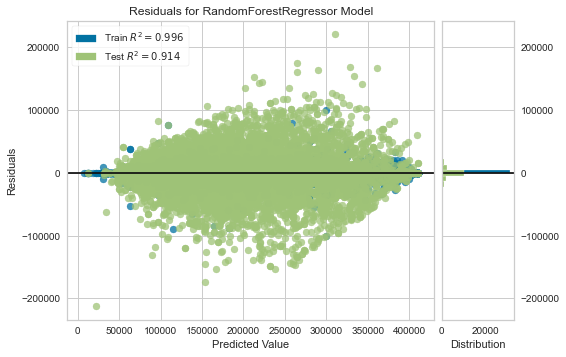

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [77]:
residuals = ResidualsPlot(estimator=rf).fit(X_train, y_train)
residuals.score(X_test, y_test)
residuals.show()

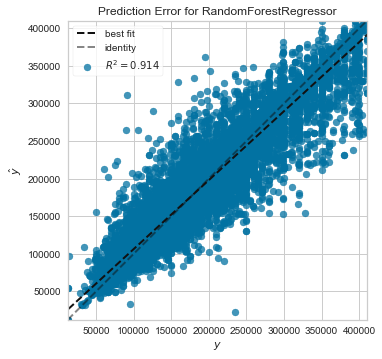

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [78]:
predictions_error = PredictionError(estimator=rf).fit(X_train, y_train)
predictions_error.score(X_test, y_test)
predictions_error.show()

Raíz del error cuadrático medio en Train: 30347.23
<br/>
Raíz del error cuadrático medio en Test: 40512.97

Aqui lo que tenemos es un caso de bajo sesgo y alta varianza. Por qué? porque tenemos un buen rendimineto en
entrenamiento y no asi en testeo
<br/>
*¿Qué soluciones podemos aplicar?*
<br/>
Una solucion para combatirlo podrias ser trabajar con el dataset completo, ya que nos brinda mas features con las que podemos trabajar

#### **Analizando los errores de nuestro modelo Bagging Regressor**

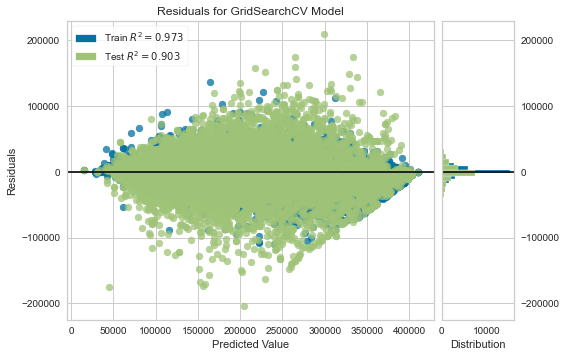

<AxesSubplot:title={'center':'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [79]:
residuals = ResidualsPlot(estimator=bg).fit(X_train, y_train)
residuals.score(X_test, y_test)
residuals.show()

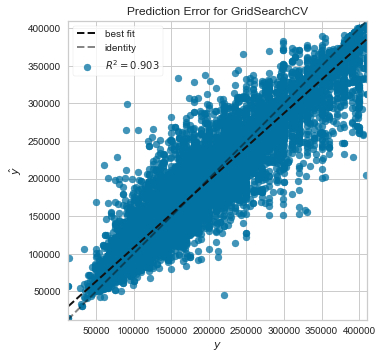

<AxesSubplot:title={'center':'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [80]:
predictions_error = PredictionError(estimator=bg).fit(X_train, y_train)
predictions_error.score(X_test, y_test)
predictions_error.show()

Raíz del error cuadrático medio en Train: 33107.51
<br/>
Raíz del error cuadrático medio en Test: 39818.5

Este es uno de los casos mas favorables, aunque el error no es el optimo, ambos train y test son cercanos por ende es un modelo mas balanceado

A simple vista los valores de train y test son mas "cercanos" o su diferencia es menor, aquello nos indica que es un modelo mas balanceado, a pesar de sufrir un sesgo mayor.



# Cierre

Como ultima instancia me gustaria hacer mencion al preprocesamiento aplicado, ya que como pudimos observar, este es muy clave a la hora de modelar. Por qué? basicamente porque los datos luego del preprocesamiento salen mucho mas entendibles para nuestro modelo, eso explica la diferencia en la evaluacion de los modelos; el primero tuvo un preprocesamiento bastante rudimentario a diferencia del segundo donde aprendimos nuevos tecnicas y metodos que aplicamos para que nuestro dataset que mas ordenado
<br/>
Llegamos a la conclucion de la vital importacia de un buen preprocesamiento y aplicar modelos con la complejidad justa para no tener problemas a la hora de la evaluacion de los mismos

PD: deje el algoritmo de regresion lineal con atributos polinomicos como un claro ejemplo de poner en practica un modelo complejo para un problema de regresion no tan complejo, lo que nos derivo a tener muy malos resultados en la evalucion que le hicimos a esta regresion